In [1]:
%pip install pandas
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#switch the years to analyze different years

#data = pd.read_csv('c:/Users/estifo/Downloads/gamma-capture-project/data/DAT_ASCII_EURUSD_M1_2010.csv', header=None, sep=';')

In [4]:
import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = r"C:\Users\estifo\OneDrive\Projects\gamma-capture-project\data"

# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2000, 2022):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())

                 0       1       2       3       4  5
0  20000530 172700  0.9302  0.9302  0.9302  0.9302  0
1  20000530 173500  0.9304  0.9305  0.9304  0.9305  0
2  20000530 173800  0.9304  0.9304  0.9303  0.9303  0
3  20000530 174300  0.9301  0.9301  0.9300  0.9300  0
4  20000530 174400  0.9298  0.9298  0.9297  0.9297  0


In [5]:
data.tail()

,0,1,2,3,4,5
7280970,20211231 165400,1.13797,1.13797,1.13774,1.13774,0
7280971,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
7280972,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
7280973,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
7280974,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [6]:
data.shape

(7280975, 6)

In [7]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [8]:
data.tail(4)

,DateTime,Open,High,Low,Close,Volume
7280971,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
7280972,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
7280973,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
7280974,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [9]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')

In [10]:
data.tail()

,DateTime,Open,High,Low,Close,Volume
7280970,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
7280971,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
7280972,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0
7280973,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0
7280974,2021-12-31 16:58:00,1.13740,1.13740,1.13681,1.13686,0


In [11]:
data.set_index('DateTime', inplace=True)

In [12]:
data

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0
2000-05-30 17:35:00,0.93040,0.93050,0.93040,0.93050,0
2000-05-30 17:38:00,0.93040,0.93040,0.93030,0.93030,0
2000-05-30 17:43:00,0.93010,0.93010,0.93000,0.93000,0
2000-05-30 17:44:00,0.92980,0.92980,0.92970,0.92970,0
...,...,...,...,...,...
2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0


In [13]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_6180\4214865167.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


In [14]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)   # Identifies missing timestamps

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


Missing Timestamps:
DatetimeIndex(['2000-05-30 17:28:00', '2000-05-30 17:29:00',
               '2000-05-30 17:30:00', '2000-05-30 17:31:00',
               '2000-05-30 17:32:00', '2000-05-30 17:33:00',
               '2000-05-30 17:34:00', '2000-05-30 17:36:00',
               '2000-05-30 17:37:00', '2000-05-30 17:39:00',
               ...
               '2021-12-30 23:48:00', '2021-12-31 00:25:00',
               '2021-12-31 00:43:00', '2021-12-31 00:48:00',
               '2021-12-31 00:52:00', '2021-12-31 01:58:00',
               '2021-12-31 02:17:00', '2021-12-31 13:43:00',
               '2021-12-31 14:07:00', '2021-12-31 14:36:00'],
              dtype='datetime64[ns]', length=4073577, freq=None)


In [15]:
data.iloc[35:45]

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 19:32:00,0.9296,0.9296,0.9296,0.9296,0
2000-05-30 19:33:00,0.9297,0.9297,0.9297,0.9297,0
2000-05-30 19:34:00,0.9296,0.9296,0.9296,0.9296,0
2000-05-30 19:35:00,0.9295,0.9295,0.9295,0.9295,0
2000-05-30 19:36:00,0.9294,0.9294,0.9293,0.9294,0
2000-05-30 19:37:00,0.9293,0.9294,0.9293,0.9293,0
2000-05-30 19:39:00,0.9294,0.9294,0.9294,0.9294,0
2000-05-30 19:42:00,0.9295,0.9295,0.9294,0.9294,0
2000-05-30 19:44:00,0.9295,0.9295,0.9295,0.9295,0


In [16]:
data.iloc[50:60]

,Open,High,Low,Close,Volume
DateTime,,,,,
2000-05-30 19:56:00,0.9297,0.9297,0.9297,0.9297,0
2000-05-30 19:57:00,0.9296,0.9296,0.9295,0.9295,0
2000-05-30 19:58:00,0.9297,0.9299,0.9297,0.9298,0
2000-05-30 19:59:00,0.9299,0.9305,0.9299,0.9305,0
2000-05-30 20:00:00,0.9306,0.9307,0.9306,0.9307,0
2000-05-30 20:01:00,0.9308,0.9308,0.9307,0.9308,0
2000-05-30 20:03:00,0.9307,0.9309,0.9307,0.9309,0
2000-05-30 20:05:00,0.9310,0.9311,0.9310,0.9311,0
2000-05-30 20:06:00,0.9312,0.9312,0.9311,0.9311,0


In [17]:
missing_timestamps.shape

(4073577,)

In [18]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [19]:
missing_df['indicator'] = 1
missing_df

,DateTime,indicator
0,2000-05-30 17:28:00,1
1,2000-05-30 17:29:00,1
2,2000-05-30 17:30:00,1
3,2000-05-30 17:31:00,1
4,2000-05-30 17:32:00,1
...,...,...
4073572,2021-12-31 01:58:00,1
4073573,2021-12-31 02:17:00,1
4073574,2021-12-31 13:43:00,1
4073575,2021-12-31 14:07:00,1


In [20]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_6180\2015894820.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')


In [21]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [22]:
# Merge the missing dataframe with the combined dataframe
combined_df = pd.merge(combined_df, missing_df, on='DateTime', how='left')

In [23]:
combined_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2000-05-30 17:27:00,0.93020,0.93020,0.93020,0.93020,0.0,NaN
1,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1.0
2,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1.0
3,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1.0
4,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...
11354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,NaN
11354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,NaN
11354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,NaN
11354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,NaN


In [24]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['indicator'].fillna(0).astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)

In [25]:
combined_df.shape

(11354552, 7)

In [26]:
#######    EXPLANATORY DATA ANALYSIS   #######

In [27]:
####   DUPLICATED DATA ANALYSIS  #####

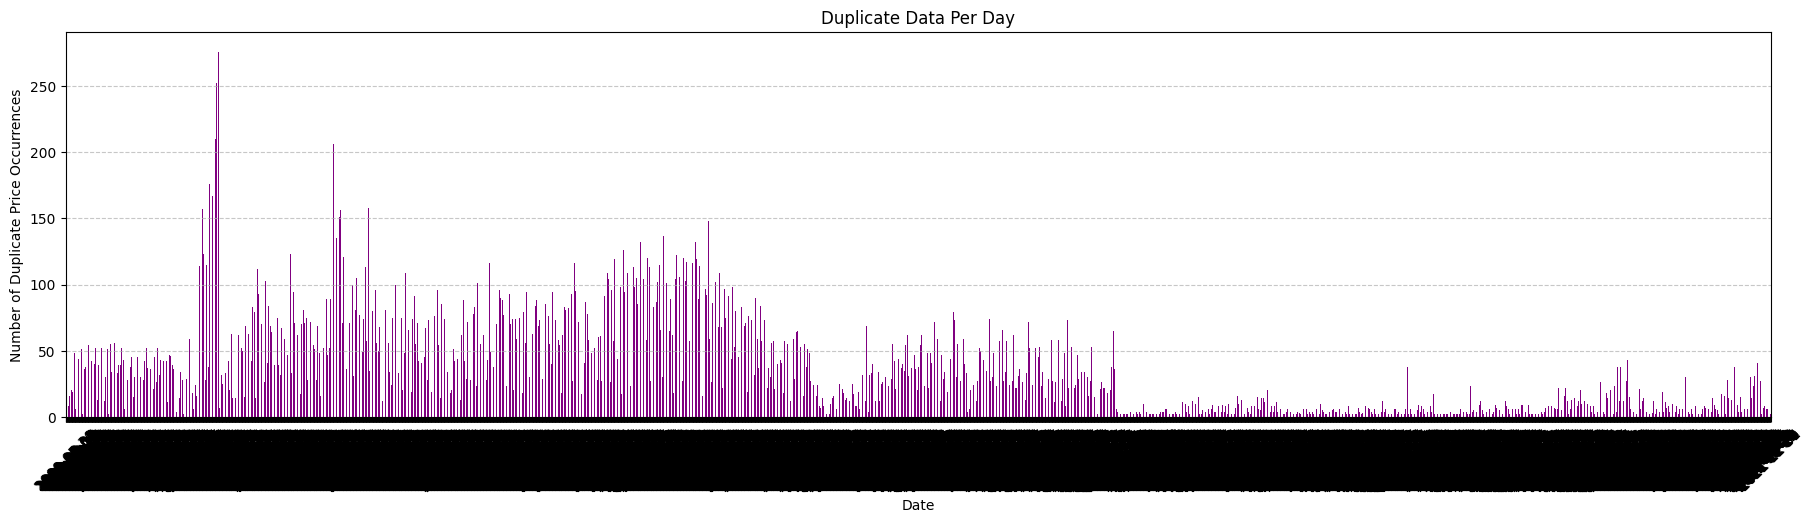

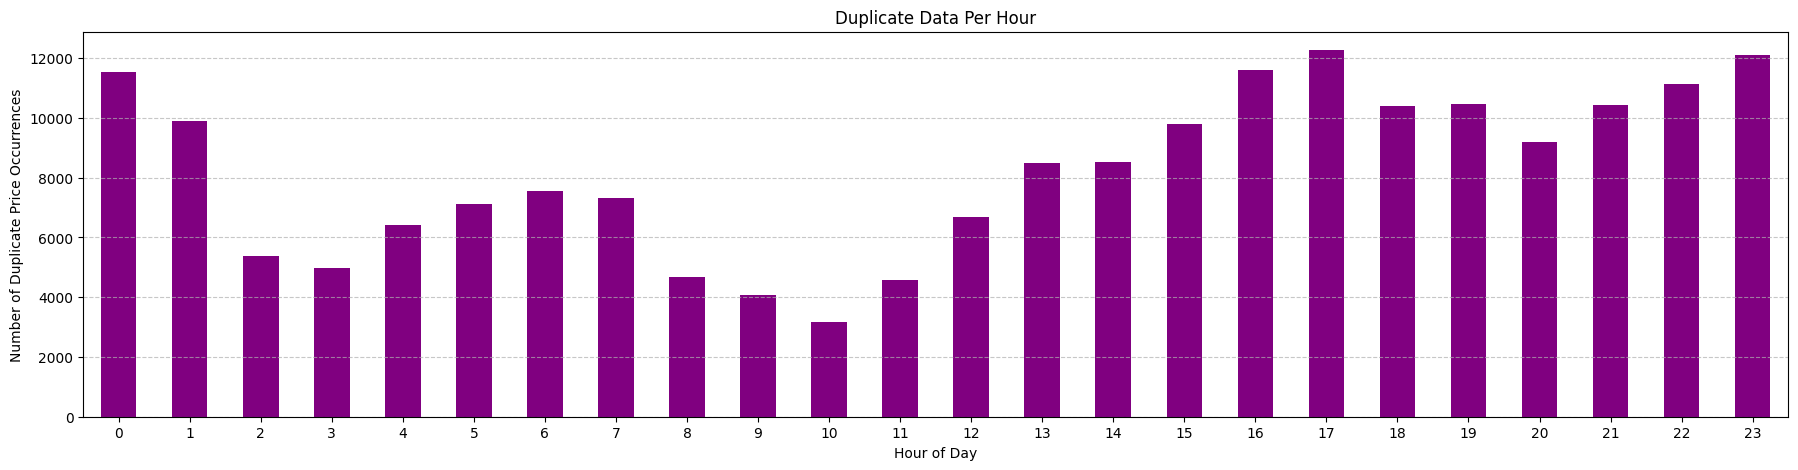

In [28]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# Plot duplicate occurrences per day
plt.figure(figsize=(22, 5))
dup_per_day.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

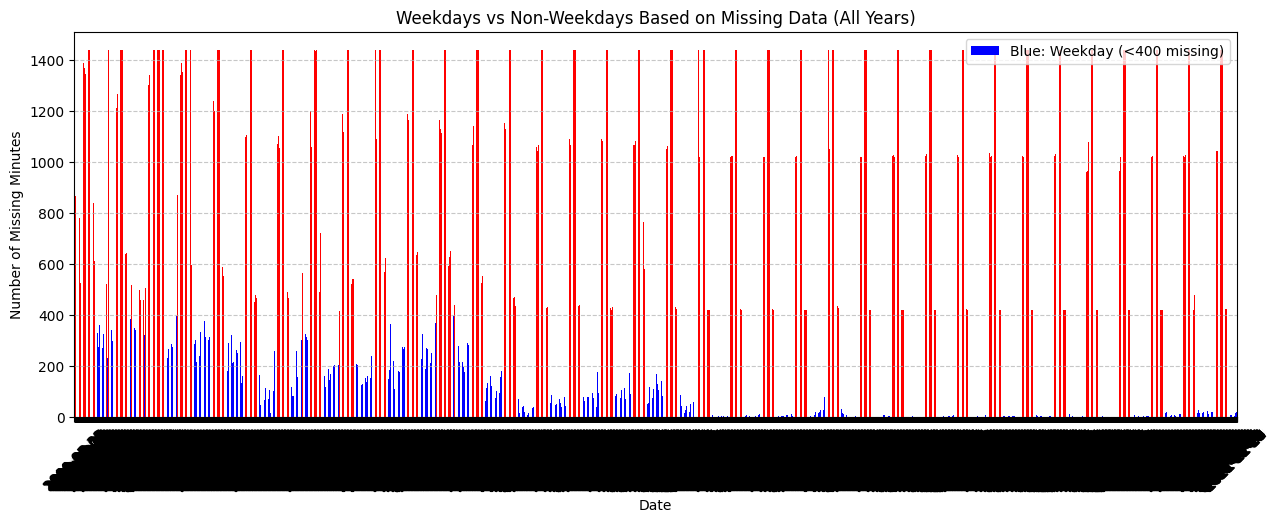

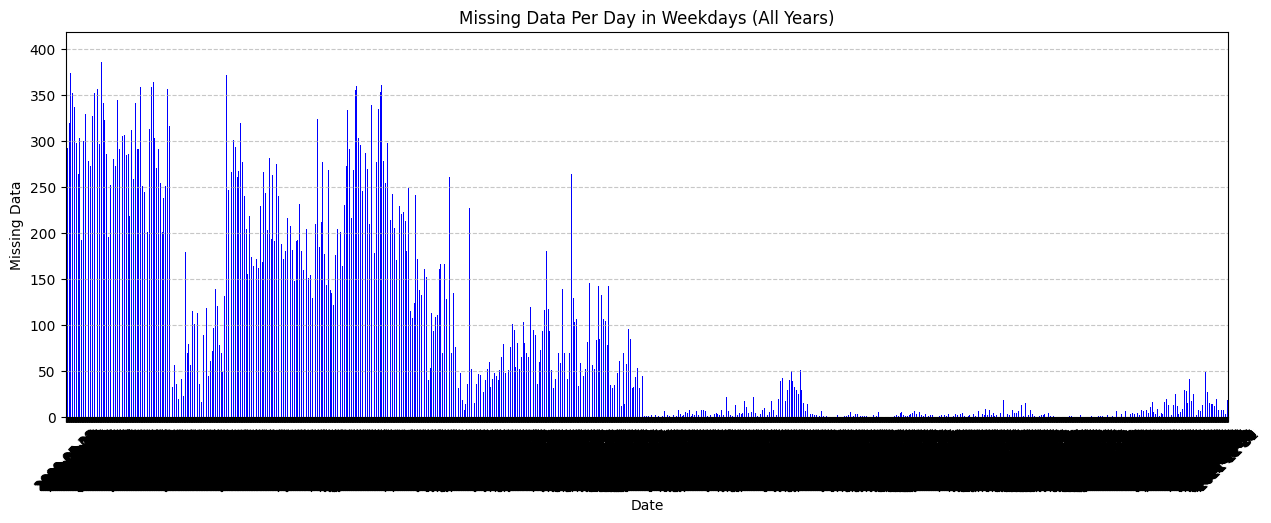

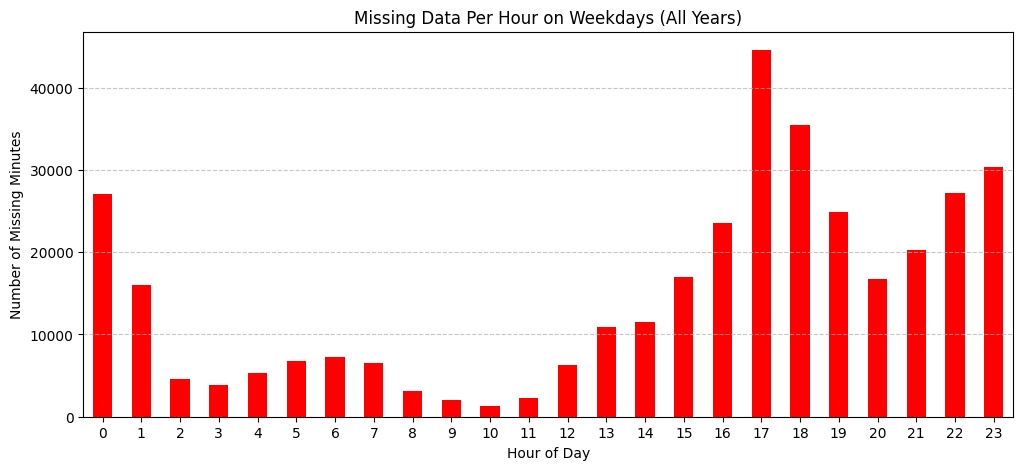

In [29]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index       

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

# Plot Step 2: Highlighting weekdays (days with missing data < 400)
plt.figure(figsize=(15, 5))
missing_per_day.plot(kind='bar', color=['blue' if date in weekdays else 'red' for date in missing_per_day.index])
plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Blue: Weekday (<400 missing)', 'Red: Non-Weekday (>=400 missing)'])
plt.show()

# Plot Step 3: Missing data per weekday across multiple years
plt.figure(figsize=(15, 5))
weekday_missing_data = missing_per_day[weekdays]
weekday_missing_data.plot(kind='bar', color='blue')
plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:
missing_per_day

DateTime
2000-05-30     267
2000-05-31     822
2000-06-01     944
2000-06-02    1077
2000-06-03    1440
              ... 
2021-12-27      30
2021-12-28      15
2021-12-29      18
2021-12-30      17
2021-12-31       9
Name: indicator, Length: 7886, dtype: int64

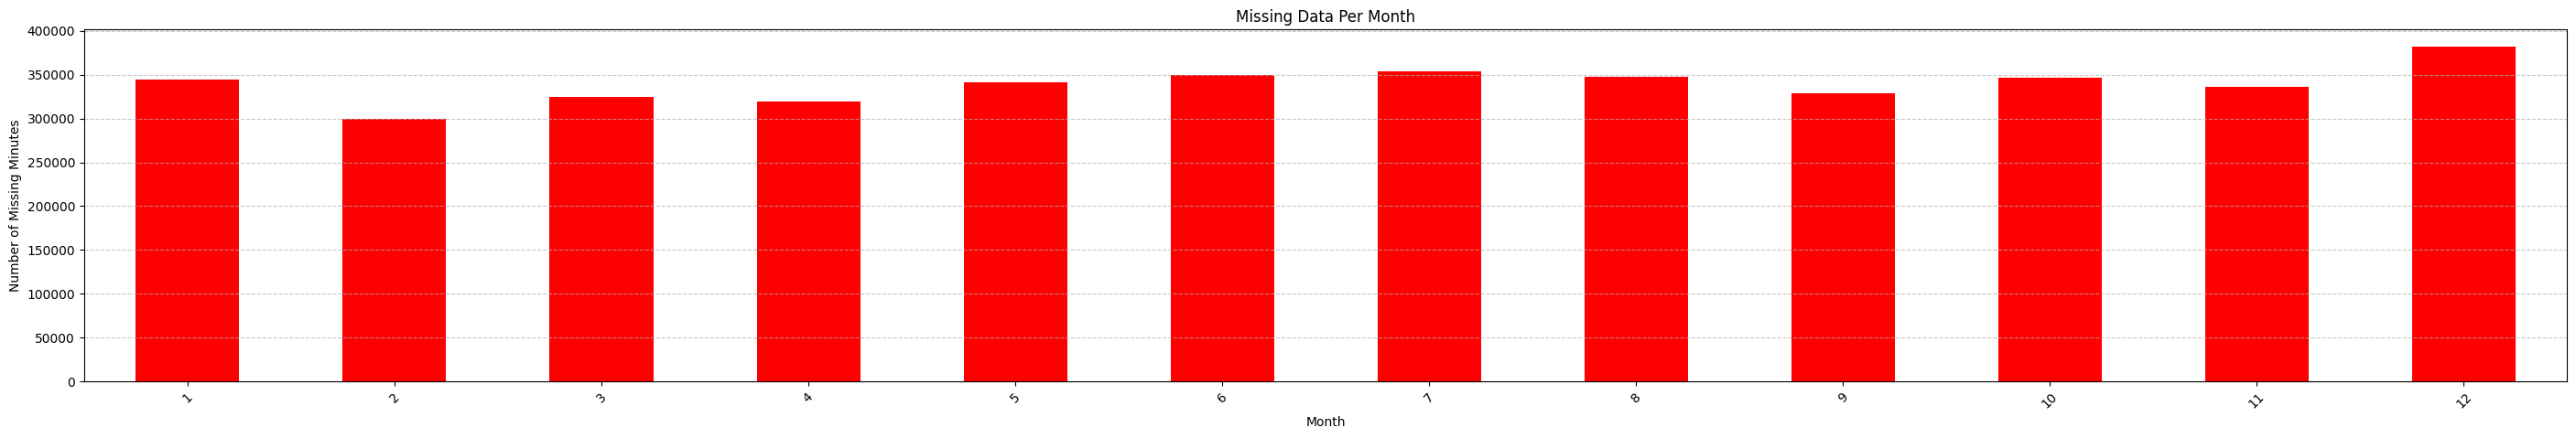

In [31]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520

In [33]:
print(missing_per_month)

DateTime
1     344618
2     299442
3     324297
4     319527
5     340878
6     349312
7     353369
8     347280
9     329058
10    346928
11    336473
12    382395
Name: indicator, dtype: int64


In [34]:
sum(missing_per_month)-(11520*12)

3935337

In [35]:
def remove_all_consecutive_duplicates(df):
    """Remove consecutive OHLC duplicates and flat bars with no price movement"""
    df_clean = df.copy()
    
    while True:
        # Check for consecutive duplicates
        prev_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(1)) & 
            (df_clean['High'] == df_clean['High'].shift(1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(1))
        )
        
        next_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(-1)) & 
            (df_clean['High'] == df_clean['High'].shift(-1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(-1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(-1))
        )
        
        # Check for flat bars (no price movement)
        flat_bar = (
            (df_clean['Open'] == df_clean['High']) & 
            (df_clean['Open'] == df_clean['Low']) & 
            (df_clean['Open'] == df_clean['Close'])
        )
        
        # Combine conditions
        is_duplicate = prev_dup | next_dup | flat_bar
        count = is_duplicate.sum()
        
        if count == 0:
            break
            
        print(f"Removing {count} duplicates and flat bars...")
        df_clean = df_clean[~is_duplicate]
    
    return df_clean

In [36]:
# Apply to your data
final_data_clean = remove_all_consecutive_duplicates(combined_df)

Removing 628960 duplicates and flat bars...
Removing 12115 duplicates and flat bars...
Removing 276 duplicates and flat bars...
Removing 12 duplicates and flat bars...


In [37]:
def check_dup(data):
    # Check for consecutive duplicates with previous row
    verify_prev = (
        (data['Open'] == data['Open'].shift(1)) & 
        (data['High'] == data['High'].shift(1)) & 
        (data['Low'] == data['Low'].shift(1)) & 
        (data['Close'] == data['Close'].shift(1))
    )
    
    # Check for consecutive duplicates with next row
    verify_next = (
        (data['Open'] == data['Open'].shift(-1)) & 
        (data['High'] == data['High'].shift(-1)) & 
        (data['Low'] == data['Low'].shift(-1)) & 
        (data['Close'] == data['Close'].shift(-1))
    )
    
    # Check for flat bars (no price movement)
    flat_bar = (
        (data['Open'] == data['High']) & 
        (data['Open'] == data['Low']) & 
        (data['Open'] == data['Close'])
    )
    
    # Count each type of duplicate
    consecutive_dups = (verify_prev | verify_next).sum()
    flat_bars = flat_bar.sum()
    total_dups = (verify_prev | verify_next | flat_bar).sum()
    
    print(f"Consecutive duplicates: {consecutive_dups}")
    print(f"Flat bars (no price movement): {flat_bars}")
    print(f"Total issues: {total_dups}")
    
    return total_dups

In [38]:
check_dup(final_data_clean)

Consecutive duplicates: 0
Flat bars (no price movement): 0
Total issues: 0


np.int64(0)

In [39]:
final_data = final_data_clean.copy()
# Ensure 'DateTime' is the index
final_data.index = pd.to_datetime(final_data.index)

<Axes: >

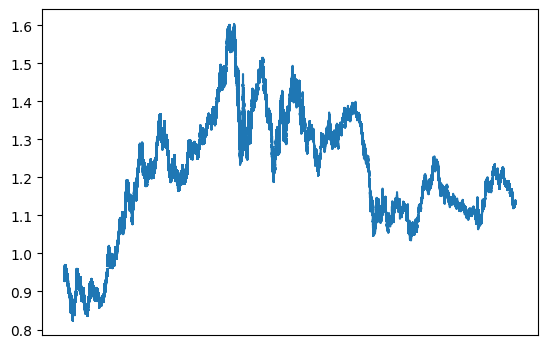

In [40]:
final_data['Close'].plot()    ### plot data nicely including years

In [41]:
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
1970-01-01 00:00:00.000000001,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1
1970-01-01 00:00:00.000000002,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1
1970-01-01 00:00:00.000000003,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1
1970-01-01 00:00:00.000000004,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1
1970-01-01 00:00:00.000000005,2000-05-30 17:32:00,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.011354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0
1970-01-01 00:00:00.011354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0
1970-01-01 00:00:00.011354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0
1970-01-01 00:00:00.011354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0


In [42]:
data = final_data.copy()

In [43]:
data['Close'].iloc[374920:374950].max()

np.float64(nan)

In [44]:
data['Close'].nlargest(n=5)

1970-01-01 00:00:00.004273192    1.6038
1970-01-01 00:00:00.004273193    1.6033
1970-01-01 00:00:00.004273196    1.6031
1970-01-01 00:00:00.004273194    1.6030
1970-01-01 00:00:00.004273191    1.6026
Name: Close, dtype: float64

In [45]:
max_idx = data['Close'].idxmax()
max_idx

Timestamp('1970-01-01 00:00:00.004273192')

In [46]:
data.loc[max_idx, :] = np.nan

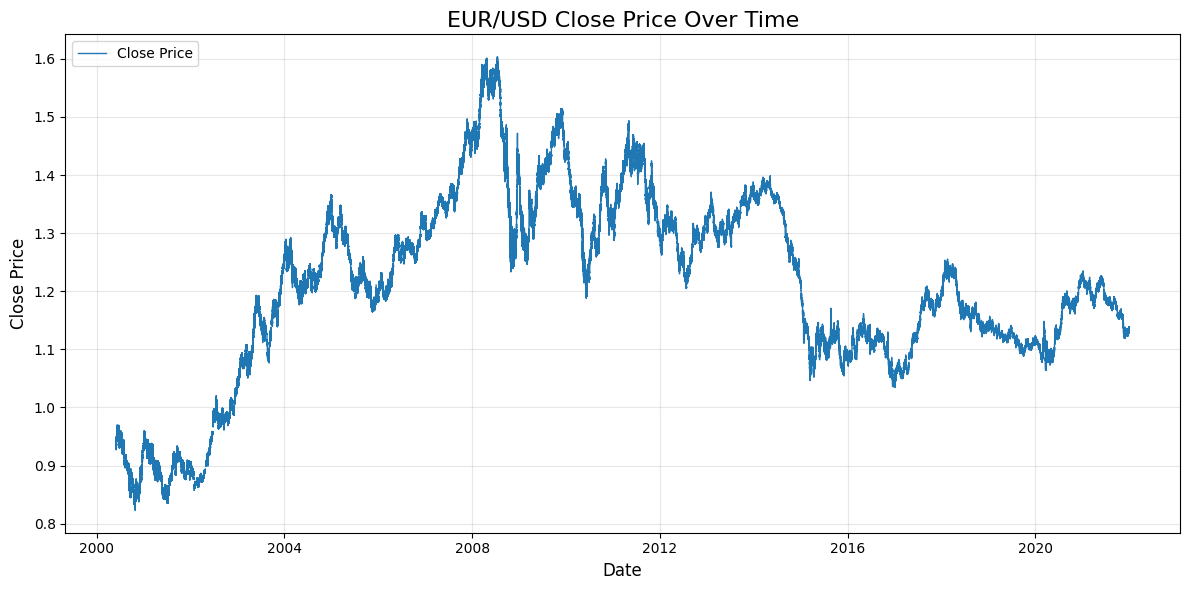

In [47]:

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [48]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
1970-01-01 00:00:00.000000001,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
1970-01-01 00:00:00.000000002,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
1970-01-01 00:00:00.000000003,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
1970-01-01 00:00:00.000000004,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
1970-01-01 00:00:00.000000005,2000-05-30 17:32:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.011354547,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0.0,16.0
1970-01-01 00:00:00.011354548,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0.0,16.0
1970-01-01 00:00:00.011354549,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0.0,16.0
1970-01-01 00:00:00.011354550,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0.0,16.0


In [49]:
data.reset_index(inplace=True)

In [50]:
data.drop(columns=['index'], inplace=True)

In [51]:
data.head(20)

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2000-05-30 17:28:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
1,2000-05-30 17:29:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
2,2000-05-30 17:30:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
3,2000-05-30 17:31:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
4,2000-05-30 17:32:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
5,2000-05-30 17:33:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
6,2000-05-30 17:34:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
7,2000-05-30 17:35:00,0.9304,0.9305,0.9304,0.9305,0.0,0.0,17.0
8,2000-05-30 17:36:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0
9,2000-05-30 17:37:00,NaN,NaN,NaN,NaN,NaN,1.0,17.0


In [52]:
#######   RVOLATILITY CALCULATION   #######

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def preprocess_ohlc_data(data, minute_interval):
    """
    Prepare OHLC data by properly formatting datetime and resampling to specified interval.
    For each timestamp, the interval is (timestamp - minute_interval + 1) to timestamp inclusive.
    For example, for 17:35:00 with 5-minute interval, we include [17:31:00 to 17:35:00].
    """
    # Ensure 'DateTime' is in datetime format
    data.reset_index(inplace=True)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
    data = data.groupby(pd.Grouper(key='DateTime', freq=f'{minute_interval}Min',closed='right',label='right')).agg({
                                          "Open":  "first",
                                          "High":  "max",
                                          "Low":   "min",
                                         "Close": "last",
                                          "Volume": "sum",
                                          "indicator": "sum",
                                          "group_id": "mean"
                                          
                                          })
    return data

def filter_incomplete_groups(ohlc_data, timeframe, threshold):
    """
    Filter out minutes within daily groups that exceed missing data threshold.
    
    Parameters:
    - ohlc_data: Minutely data with an indicator column (1 = missing, 0 = present)
    - timeframe: Largest grouping interval (typically daily)
    - threshold: Maximum allowed missing minutes within the daily group
    
    Returns:
    - Filtered minutely data
    """
    
    ohlc_data['DateTime'] = pd.to_datetime(ohlc_data['DateTime'], format='%Y%m%d %H%M%S')
    ohlc_data = ohlc_data.set_index('DateTime')
    
    # Group by the largest timeframe
    ohlc_data['group_id'] = (
        ohlc_data
        .groupby(pd.Grouper(freq=f"{timeframe}T"))
        .ngroup()
        + 1
    )
    
    # 3) count missing per group
    missing_minutes_per_timeframe = ohlc_data.groupby('group_id')['indicator'].sum()
    
    # Calculate threshold count for missing minutes per timeframe
    threshold_count = timeframe * threshold
    
    # Identify days with too many missing minutes
    timeframes_to_remove = missing_minutes_per_timeframe[missing_minutes_per_timeframe > threshold_count].index
    
    # Filter out ALL minutes for timeframes exceeding the missing data threshold 
    filtered_data = ohlc_data[~ohlc_data['group_id'].isin(timeframes_to_remove)].copy()
    
    missing_minutes_per_timeframe_after_filter = filtered_data.groupby('group_id')['indicator'].sum()
    
    # Optional: Print diagnostic information
    print(f"Original data shape: {ohlc_data.shape}")
    print(f"Threshold value: {threshold} ({threshold_count} points)")
    print(f"Filtered data shape: {filtered_data.shape}")
    print(f"timeframes removed: {len(timeframes_to_remove)}")
    print(f"Total timeframes: {len(missing_minutes_per_timeframe)}")
    
    #Plot
    '''
    plt.figure(figsize=(15, 5))
    missing_minutes_per_timeframe.plot(kind='bar', color='blue')
    plt.title('Missing Minutes Per Timeframe')
    plt.xlabel('DateTime')
    plt.ylabel('Missing Data')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()'''
    
    plt.figure(figsize=(15, 5))
    missing_minutes_per_timeframe_after_filter.plot(kind='bar', color='blue')
    plt.title('Missing Minutes Per Timeframe')
    plt.xlabel('DateTime')
    plt.ylabel('Missing Data')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    return filtered_data

def compute_volatility_measure(ohlc_data, vol_measure):
    """
    Calculate volatility using the specified method.
    
    Parameters:
    - ohlc_data (pd.DataFrame): OHLC data
    - vol_measure (str): Volatility measure ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close')
    
    Returns:
    - ohlc_data (pd.DataFrame): OHLC data with volatility measure added
    """
    # Make a copy to avoid modifying the input
    ohlc_data = ohlc_data.copy()
    
    # Constant for Garman-Klass
    k = 2 * np.log(2) - 1
    
    # Compute volatility measures (Variance)
    if vol_measure == 'Garman-Klass':
        ohlc_data['V'] = 0.5 * (np.log(ohlc_data['High'] / ohlc_data['Low']) ** 2) - \
                       k * (np.log(ohlc_data['Close'] / ohlc_data['Open']) ** 2)
    elif vol_measure == 'Rogers-Satchell':
        ohlc_data['V'] = (np.log(ohlc_data['High'] / ohlc_data['Open']) * 
                        np.log(ohlc_data['High'] / ohlc_data['Close']) +
                        np.log(ohlc_data['Low'] / ohlc_data['Open']) * 
                        np.log(ohlc_data['Low'] / ohlc_data['Close']))
    elif vol_measure == 'Close-to-Close':
        ohlc_data['Log_Returns'] = np.log(ohlc_data['Close'] / ohlc_data['Close'].shift(1))
        ohlc_data['V'] = ohlc_data['Log_Returns'] ** 2
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")
    
    return ohlc_data

def setup_rvol_col(data, timeframe, vol_measure):
    """
    The overall purpose is to:
    1. Compute variance contributions for each row
    2. Calculate realized volatility for each group
    3. Attach the group's volatility to every row in that group
    """
    # 1) Compute per-bar variance contributions (V) for each row
    v_by_group = data.groupby('group_id')\
                     .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
    
    # If it came back as a DataFrame, pick its 'V' column
    if isinstance(v_by_group, pd.DataFrame):
        v_series = v_by_group['V']
    else:
        v_series = v_by_group
    
    # Ensure index is consistent
    v_series = v_series.reset_index(level=0, drop=True)
    
    # 2) Attach per-bar V back onto a copy of your DataFrame
    df = data.copy()
    df['V'] = np.nan  # Preallocate
    df.loc[v_series.index, 'V'] = v_series
    
    # 3) Compute sample variance per group: sum(V) / (n - 1)
    grp_stats = df.groupby('group_id')['V']\
                  .agg(['sum', 'count'])
    
    # Adjust for groups with insufficient data
    grp_stats['var'] = np.where(
        grp_stats['count'] > 1, 
        grp_stats['sum'] / (grp_stats['count'] - 1), 
        np.nan
    )
    
    # 4) Take square root → realized volatility per group
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    
    annualized_rvol = rvol_per_group * np.sqrt(252 * 24 * 60 / timeframe)
    
    # 5) Broadcast that single vol back onto every row
    df[col_name] = df['group_id'].map(annualized_rvol)
    
    return df
##TODO: Look into Garman-Klass and adjust diving it by (1/2T-1) instead of (n-1) 
##TODO: Look into CLOSE-CLOSE and add logic, if next period (t) = Nan, then use t+1 period open.

def plot_realized_volatility(rvol_df, vol_measure, timeframe):
    """
    Plot realized volatility over time.
    
    Parameters:
    - rvol_df (pd.DataFrame): DataFrame with realized volatility values
    - vol_measure (str): Volatility measure used
    - timeframe (int): Timeframe used for calculation
    """
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    
    plt.figure(figsize=(30, 15))
    plt.scatter(rvol_df.index, rvol_df[col_name], 
               label=f'Realized Volatility ({vol_measure}, {timeframe} min)', 
               color='b', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Realized Volatility')
    plt.title(f'Realized Volatility Over Time ({vol_measure}, {timeframe} min)')
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_rvol(data, vol_measure, timeframe, minute_interval, threshold, plot=True):
    """
    Main function to compute realized volatility (rVol) with preprocessing to handle missing data.
    
    Parameters:
    - data (pd.DataFrame): A dataframe with 'DateTime' column and OHLC prices.
    - vol_measure (str): The volatility measure to use ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close').
    - timeframe (int): The time window for realized volatility (must be a multiple of 60 minutes).
    - minute_interval (int): The granularity of minute data (1, 5, 10, etc.).
    - threshold (float): The threshold (percentage) of missing data above which the group is dropped.
    - plot (bool): Whether to plot the realized volatility.
    - debug (bool): Whether to print debugging information.
    
    Returns:
    - rvol_df (pd.DataFrame): A dataframe containing the calculated realized volatility.
    """
    # Input validation
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    
    
    # Step 1: Filter incomplete timeframe groups
    filtered_ohlc_data = filter_incomplete_groups(data, timeframe, threshold)
    
    # Step 2: Preprocess data
    grouped_ohlc_data = preprocess_ohlc_data(filtered_ohlc_data, minute_interval)
    
    # Step 3: Compute volatility measures
    compute_volatility_measure(grouped_ohlc_data, vol_measure)
    
    # Step 4: Aggregate into realized volatility
    rvol_df = setup_rvol_col(grouped_ohlc_data, timeframe, vol_measure)
    
    # Step 5: Plot if requested
    if plot:
        plot_realized_volatility(rvol_df, vol_measure, timeframe)
    
    return rvol_df

C:\Users\estifo\AppData\Local\Temp\ipykernel_6180\840087176.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


Original data shape: (10713189, 8)
Threshold value: 0.1 (12.0 points)
Filtered data shape: (5773986, 8)
timeframes removed: 44552
Total timeframes: 94621


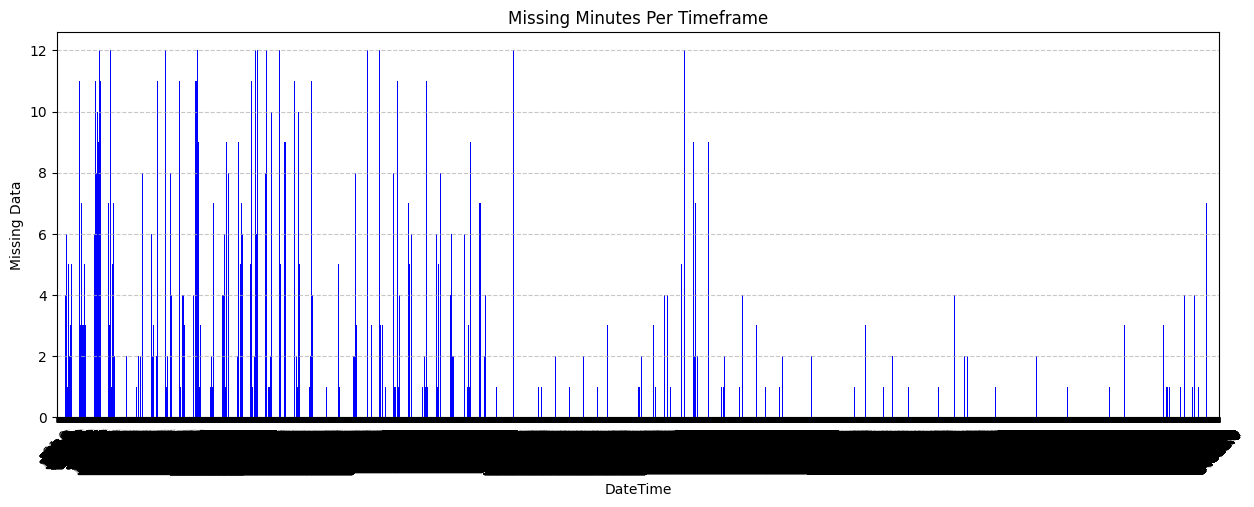

C:\Users\estifo\AppData\Local\Temp\ipykernel_6180\840087176.py:136: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
C:\Users\estifo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


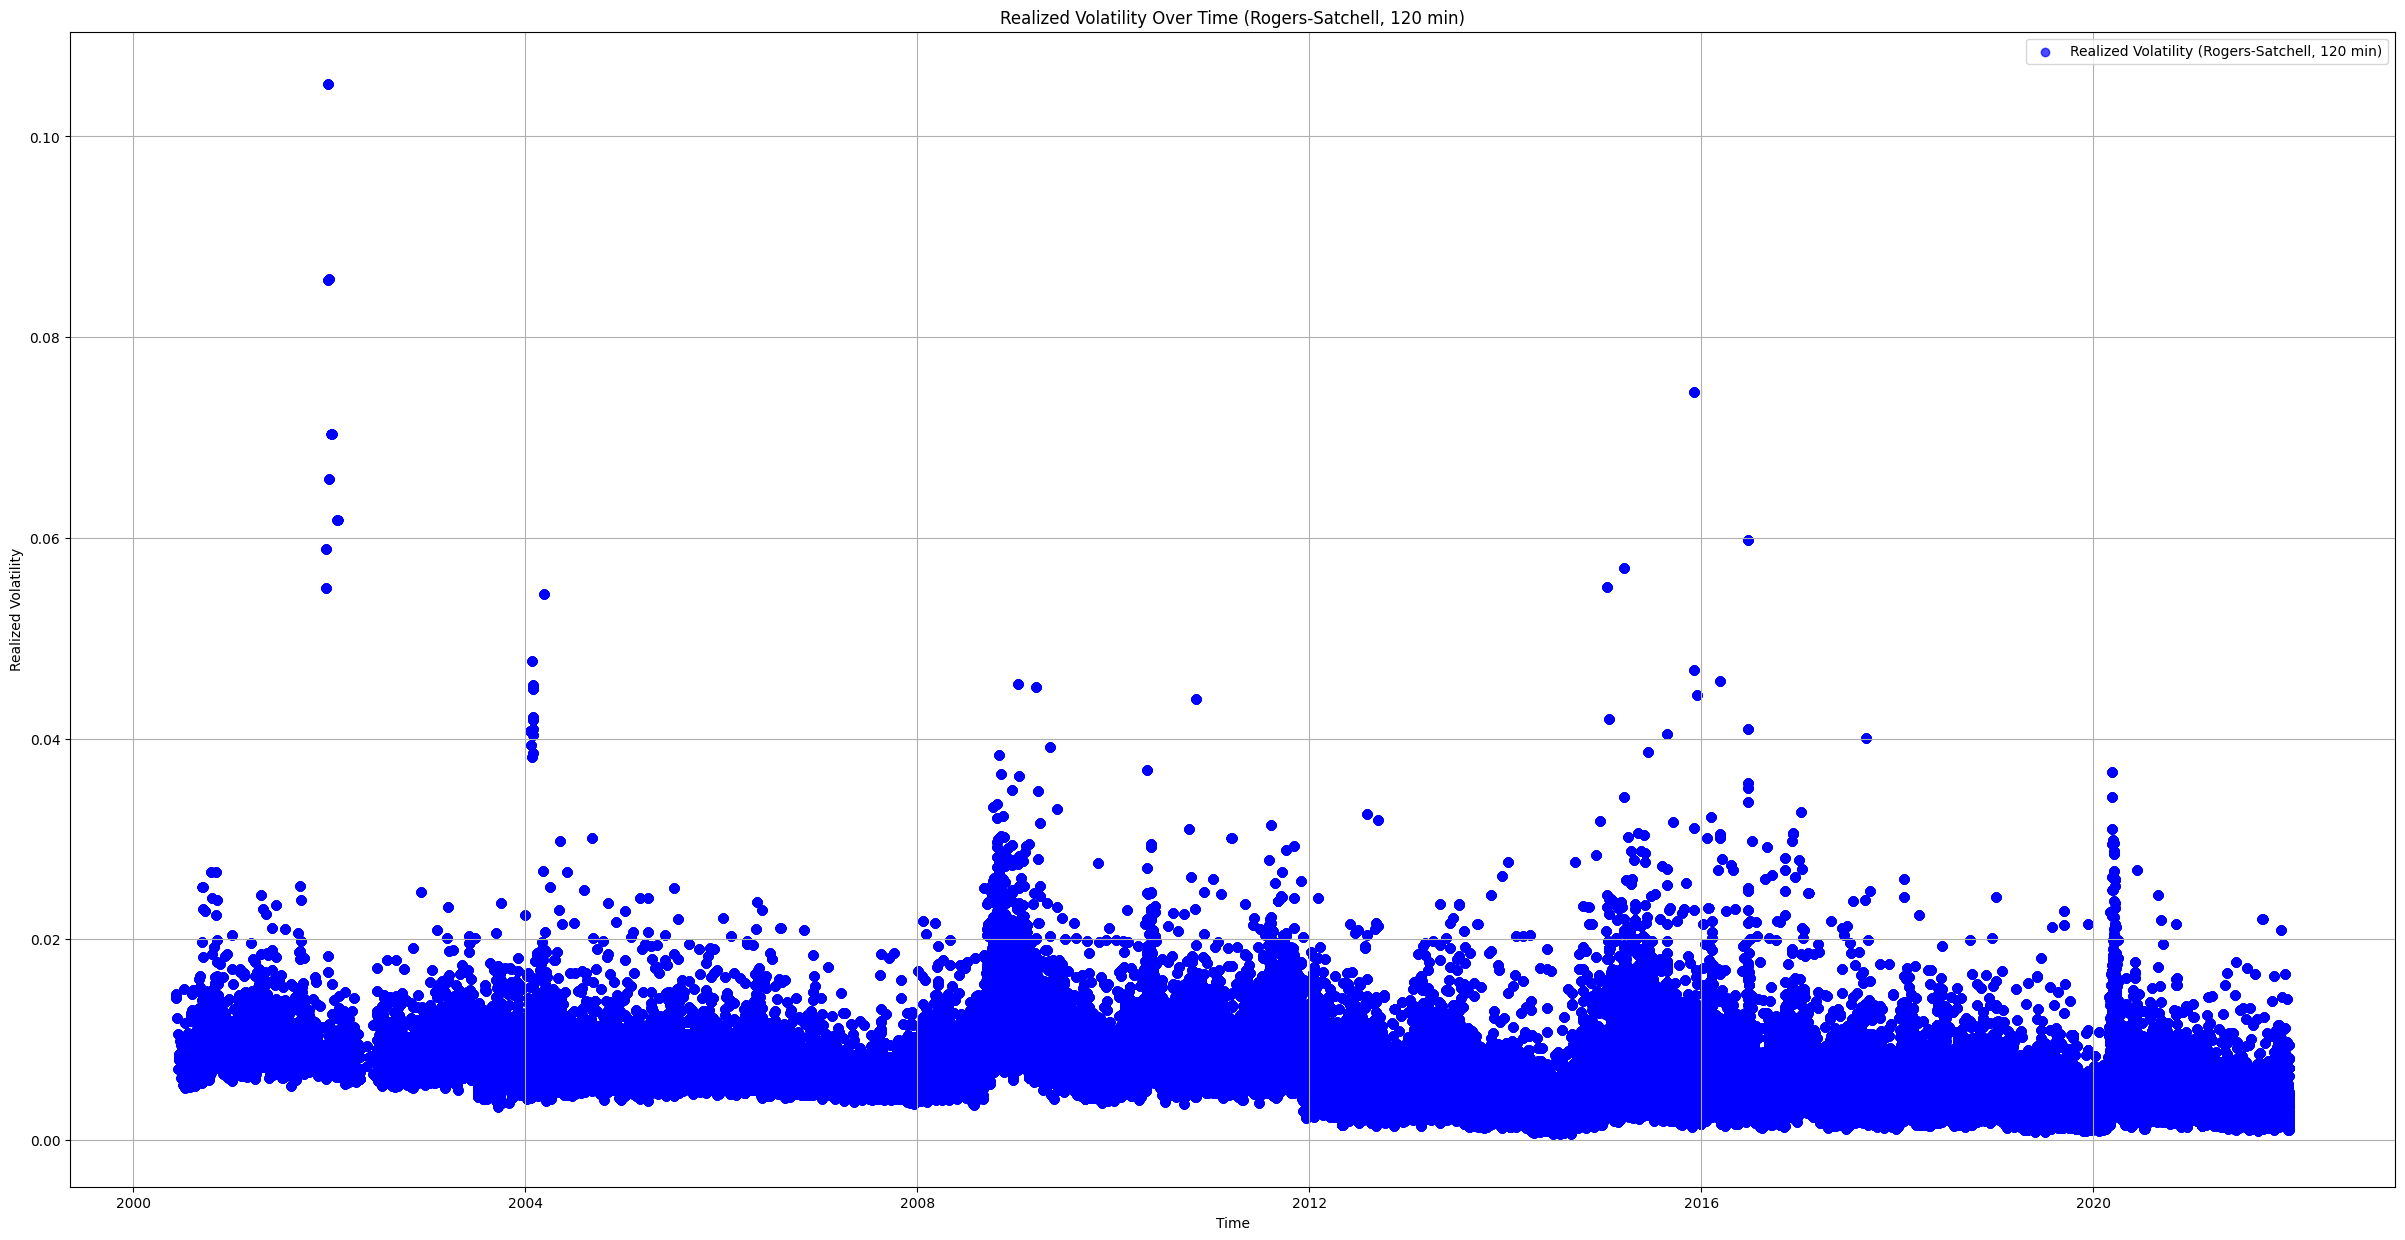

In [82]:
RS_120m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 120, minute_interval = 1, threshold = 0.1)  # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [69]:
RS_120m_rvol.head(20)

,Open,High,Low,Close,Volume,indicator,group_id,V,RVol_120min_Rogers-Satchell
DateTime,,,,,,,,,
2000-06-06 08:00:00,NaN,NaN,NaN,NaN,0.0,1.0,81.0,NaN,0.014565
2000-06-06 08:01:00,NaN,NaN,NaN,NaN,0.0,1.0,81.0,NaN,0.014565
2000-06-06 08:02:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2000-06-06 08:03:00,0.9480,0.9481,0.9480,0.9481,0.0,0.0,81.0,0.000000e+00,0.014565
2000-06-06 08:04:00,0.9480,0.9480,0.9479,0.9479,0.0,0.0,81.0,0.000000e+00,0.014565
2000-06-06 08:05:00,NaN,NaN,NaN,NaN,0.0,1.0,81.0,NaN,0.014565
2000-06-06 08:06:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2000-06-06 08:07:00,0.9477,0.9478,0.9477,0.9477,0.0,0.0,81.0,1.113301e-08,0.014565
2000-06-06 08:08:00,0.9476,0.9482,0.9476,0.9482,0.0,0.0,81.0,0.000000e+00,0.014565


In [55]:
RS_120m_rvol.describe()

,Open,High,Low,Close,Volume,indicator,group_id,V,RVol_120min_Rogers-Satchell
count,5.695890e+06,5.695890e+06,5.695890e+06,5.695890e+06,11344859.0,1.134486e+07,5.773985e+06,5.695890e+06,5.773985e+06
mean,1.227968e+00,1.228081e+00,1.227855e+00,1.227968e+00,0.0,6.883735e-03,5.689742e+04,2.055406e-08,6.742705e-03
std,1.306980e-01,1.307175e-01,1.306792e-01,1.306984e-01,0.0,8.268222e-02,2.414532e+04,2.258079e-07,4.133609e-03
min,8.232000e-01,8.234000e-01,8.229000e-01,8.233000e-01,0.0,0.000000e+00,8.100000e+01,0.000000e+00,5.692628e-04
25%,1.127770e+00,1.127850e+00,1.127690e+00,1.127770e+00,0.0,0.000000e+00,3.964300e+04,7.423126e-10,3.838088e-03
50%,1.212800e+00,1.212900e+00,1.212710e+00,1.212800e+00,0.0,0.000000e+00,5.933300e+04,5.728569e-09,6.070402e-03
75%,1.323800e+00,1.323900e+00,1.323690e+00,1.323800e+00,0.0,0.000000e+00,7.697500e+04,1.884985e-08,8.567606e-03
max,1.603600e+00,1.603800e+00,1.603200e+00,1.603300e+00,0.0,1.000000e+00,9.462100e+04,1.367719e-04,1.051987e-01


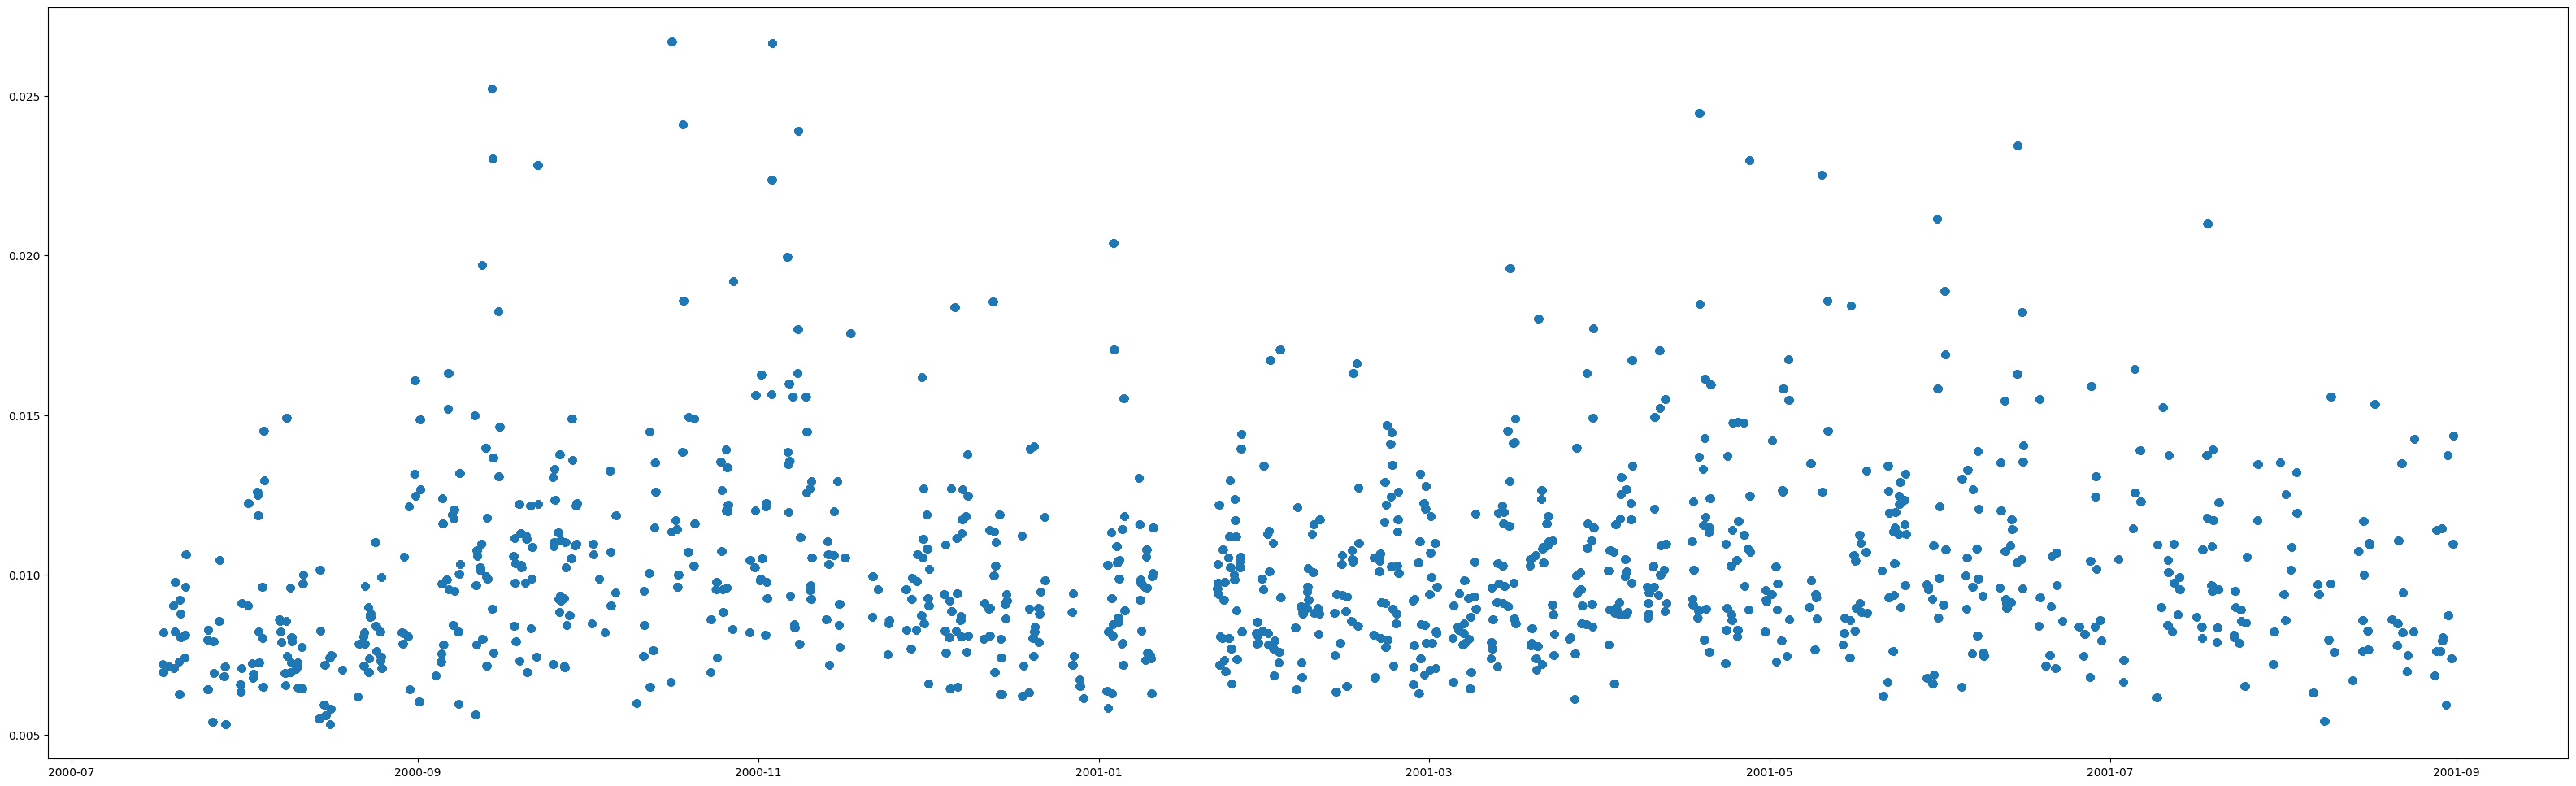

In [56]:
sample = RS_120m_rvol['RVol_120min_Rogers-Satchell'][59000:650000]

plt.figure(figsize = (40,12))
plt.scatter(sample.index , sample, alpha = 0.7)

C:\Users\estifo\AppData\Local\Temp\ipykernel_6180\840087176.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


Original data shape: (10713189, 8)
Threshold value: 0.2 (144.0 points)
Filtered data shape: (5813851, 8)
timeframes removed: 7212
Total timeframes: 15771


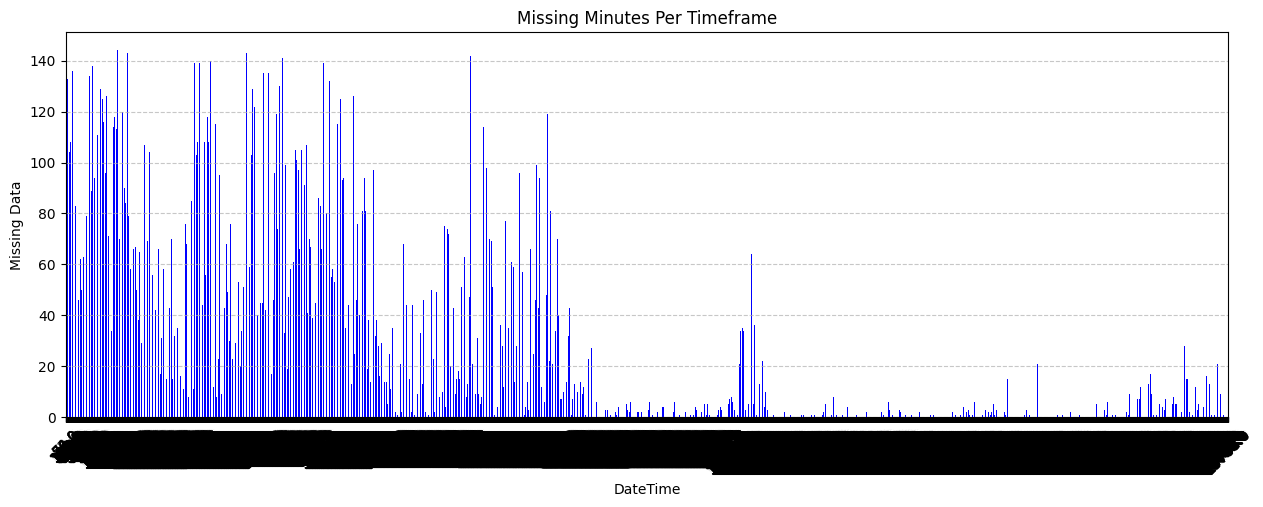

C:\Users\estifo\AppData\Local\Temp\ipykernel_6180\840087176.py:136: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
C:\Users\estifo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


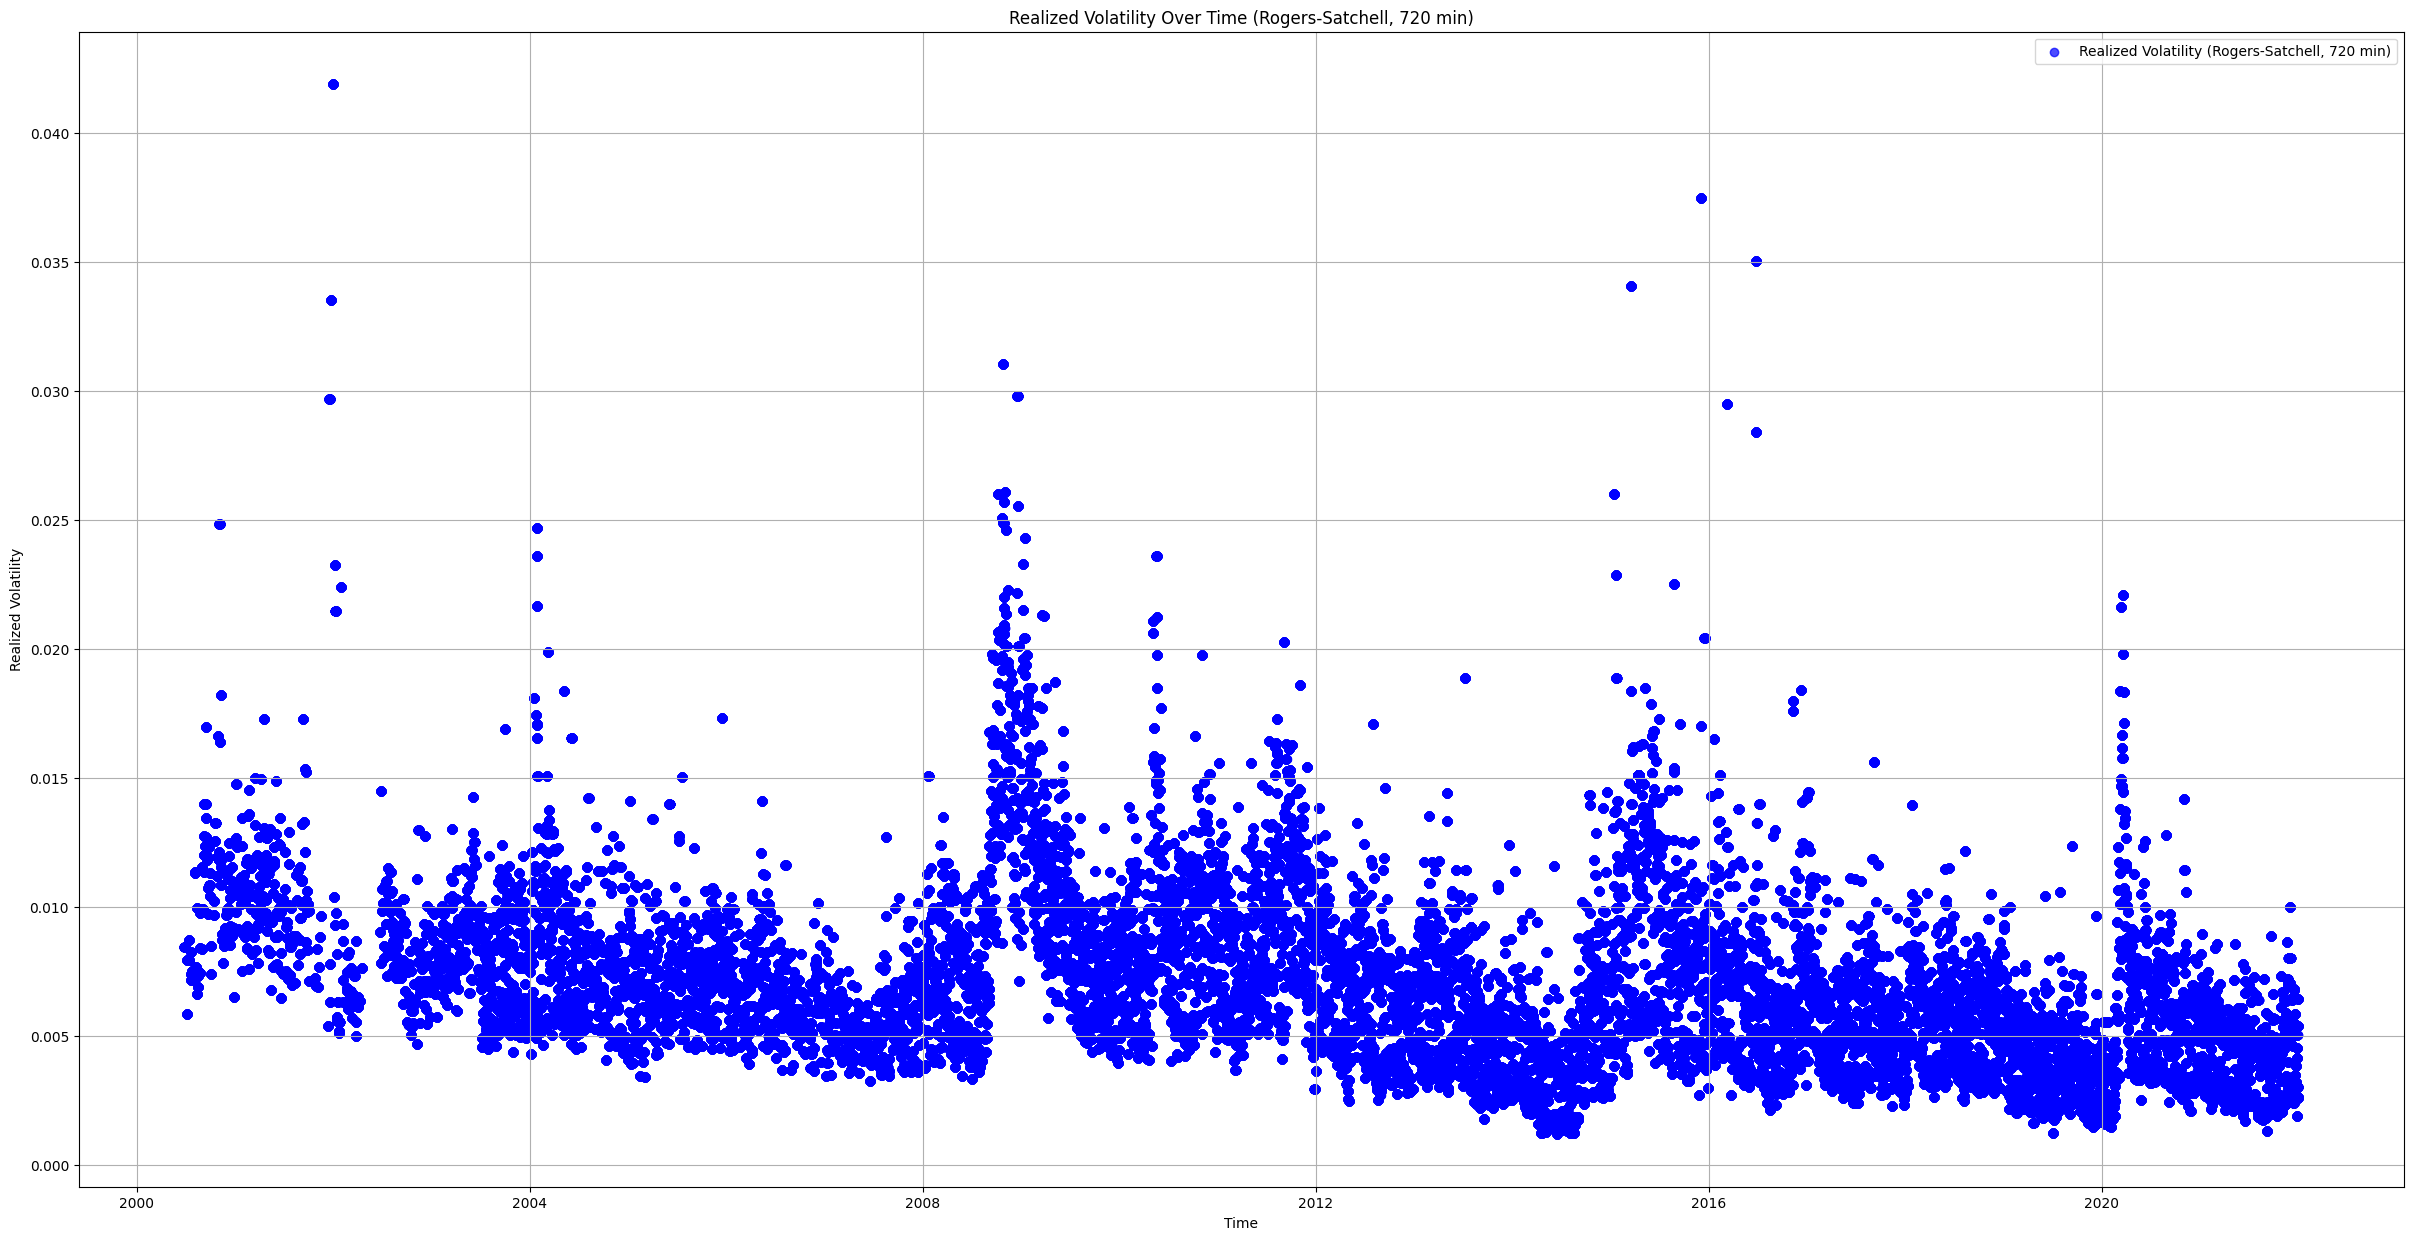

In [57]:

RS_720m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 720, minute_interval = 5, threshold = 0.2)  # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [58]:
RS_720m_rvol.describe()

,Open,High,Low,Close,Volume,indicator,group_id,V,RVol_720min_Rogers-Satchell
count,1.222125e+06,1.222125e+06,1.222125e+06,1.222125e+06,2263309.0,2.263309e+06,1.232837e+06,1.222125e+06,1.226510e+06
mean,1.232581e+00,1.232857e+00,1.232307e+00,1.232581e+00,0.0,9.487746e-02,8.834893e+03,1.216059e-07,7.067928e-03
std,1.384150e-01,1.384548e-01,1.383760e-01,1.384155e-01,0.0,4.397453e-01,4.202509e+03,5.934310e-07,3.430788e-03
min,8.234000e-01,8.238000e-01,8.229000e-01,8.234000e-01,0.0,0.000000e+00,5.400000e+01,0.000000e+00,1.182245e-03
25%,1.129800e+00,1.130020e+00,1.129590e+00,1.129800e+00,0.0,0.000000e+00,5.646000e+03,1.360955e-08,4.699889e-03
50%,1.222260e+00,1.222500e+00,1.222000e+00,1.222270e+00,0.0,0.000000e+00,9.042000e+03,4.289073e-08,6.516441e-03
75%,1.331200e+00,1.331500e+00,1.330850e+00,1.331190e+00,0.0,0.000000e+00,1.240900e+04,1.161397e-07,8.758993e-03
max,1.603200e+00,1.603800e+00,1.602100e+00,1.603300e+00,0.0,5.000000e+00,1.577100e+04,1.505743e-04,4.189761e-02


C:\Users\estifo\AppData\Local\Temp\ipykernel_6180\840087176.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq=f"{timeframe}T"))


Original data shape: (10713189, 8)
Threshold value: 0.2 (576.0 points)
Filtered data shape: (4861415, 8)
timeframes removed: 2160
Total timeframes: 3943


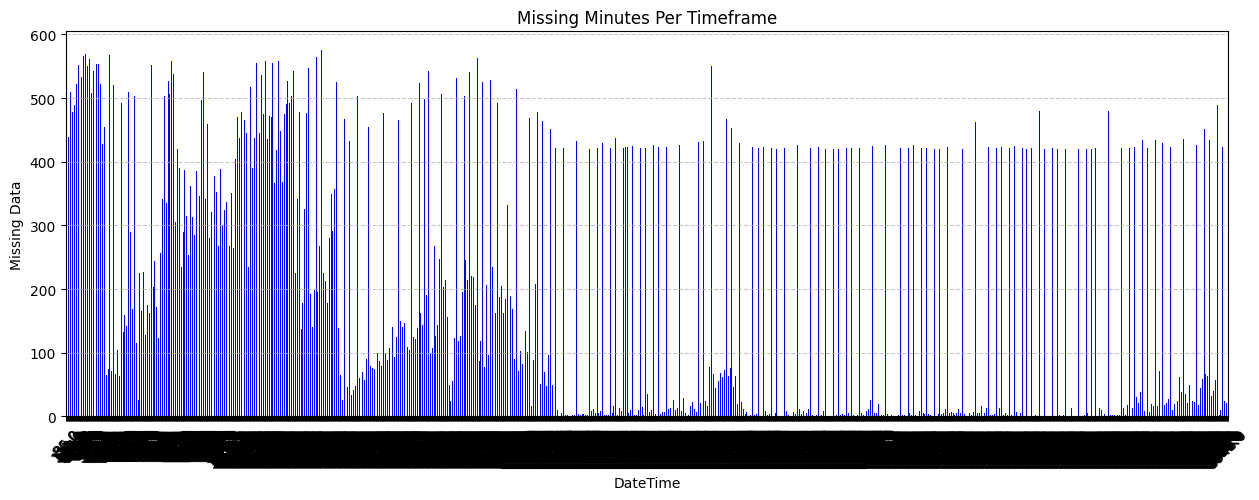

C:\Users\estifo\AppData\Local\Temp\ipykernel_6180\840087176.py:136: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


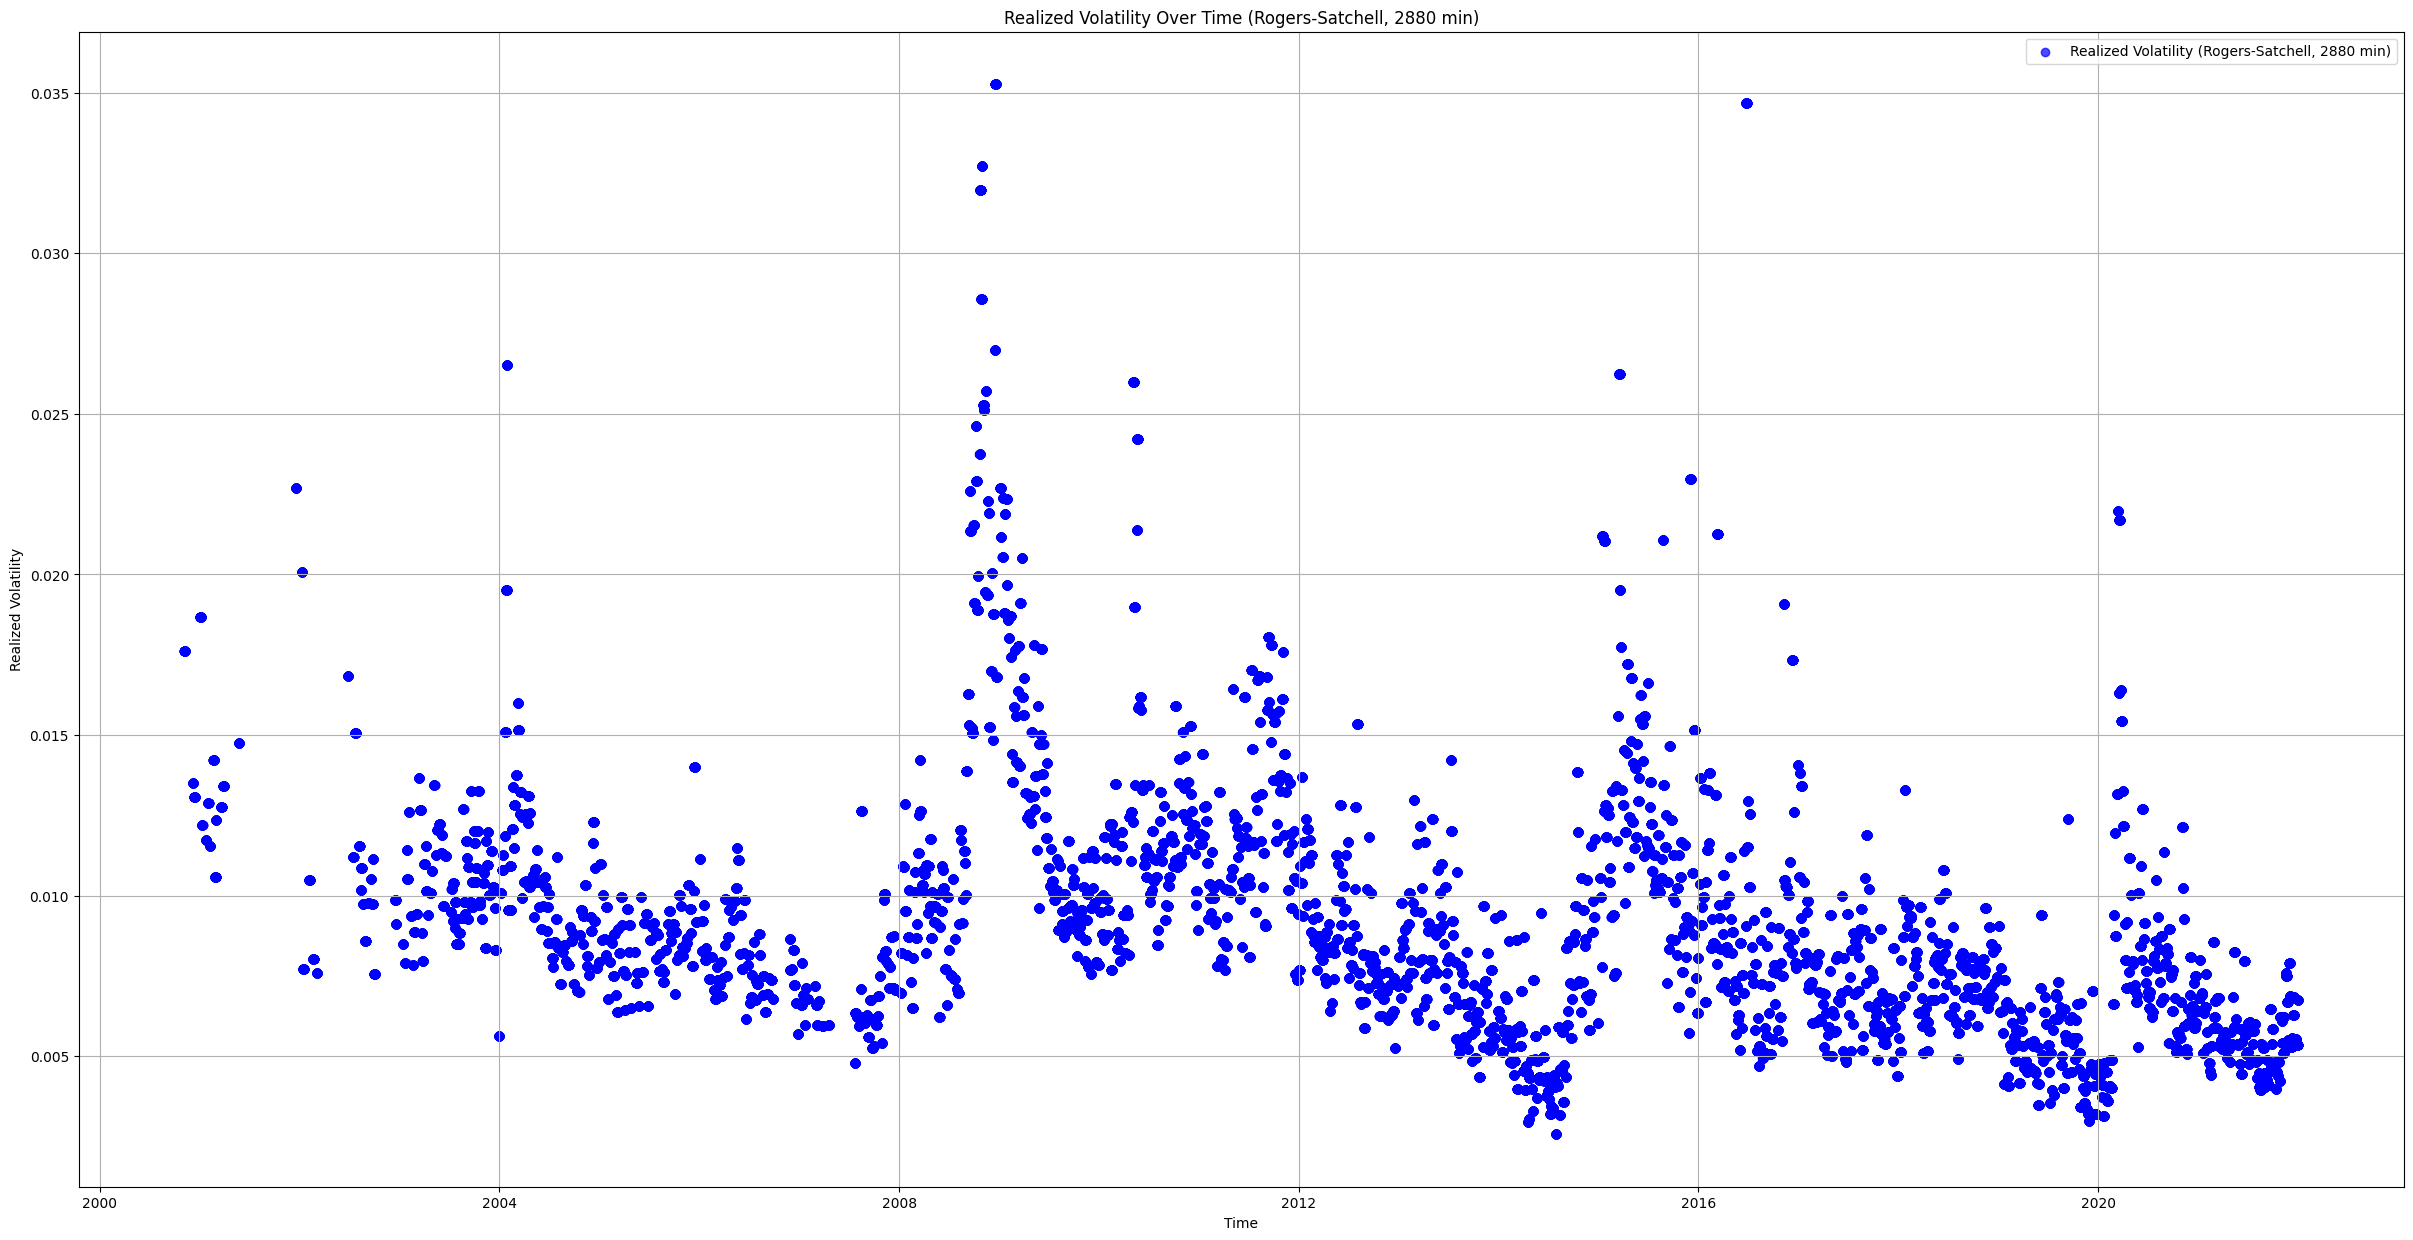

In [59]:
rvol_2880m_rs = calculate_rvol(data, vol_measure='Rogers-Satchell', timeframe=2880, minute_interval= 30, threshold=0.2) # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [60]:
rvol_2880m_rs['RVol_2880min_Rogers-Satchell'].describe()

count    171301.000000
mean          0.009147
std           0.003812
min           0.002570
25%           0.006659
50%           0.008488
75%           0.010803
max           0.035262
Name: RVol_2880min_Rogers-Satchell, dtype: float64

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def plot_rvol_histogram(rvol_data, title='Realized Volatility Histogram', bins=100):
    """
    Plots a histogram of realized volatility values.

    Parameters:
    - rvol_data (pd.Series or pd.DataFrame): The realized volatility data.
    - title (str): The title of the plot.
    - bins (int): Number of histogram bins.
    """

    # If DataFrame, extract the first column
    if isinstance(rvol_data, pd.DataFrame):
        rvol_data = rvol_data.iloc[:, 0]

    # Drop NaN values
    #rvol_data = rvol_data.dropna()

    # Drop NaN and inf/-inf
    rvol_data = rvol_data.replace([np.inf, -np.inf], np.nan).dropna()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(rvol_data, bins=bins, edgecolor='k', alpha=0.7)

    # Mean line
    mean_val = rvol_data.mean()
    plt.axvline(x=mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.4f}')

    # Labels and title
    plt.title(title)
    plt.xlabel('Realized Volatility')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_volatility_prediction(rVol, rVol_pred, time):
    # Calculate log ratio
    log_ratio = np.log(rVol / rVol_pred)
    
    # Compute statistics
    stats = {
        'mean': np.mean(log_ratio),
        'std': np.std(log_ratio),
        'skew': pd.Series(log_ratio).skew(),
        'kurtosis': pd.Series(log_ratio).kurt(),
        'correlation': np.corrcoef(rVol, rVol_pred)[0,1]
    }
    
    
    plt.figure(figsize=(10,5))
    plt.scatter(time, log_ratio)
    plt.title('ln(rVol/rVol_pred) Over Time')
    plt.xlabel('Time')
    plt.ylabel('Log Ratio')
    plt.axhline(y=0, color='r', linestyle='--')  # This adds a horizontal red dashed line at y=0
    plt.show()

        # Print out interpretation
    print("Prediction Quality Analysis:")
    print(f"Mean (Bias): {stats['mean']:.4f}")
    print(f"  > Close to 0 = Unbiased predictions")
    print(f"Standard Deviation (Consistency): {stats['std']:.4f}")
    print(f"  > Smaller = More consistent predictions")
    print(f"Skewness (Error Asymmetry): {stats['skew']:.4f}")
    print(f"  > 0 = Symmetric errors")
    print(f"  > Positive = More over-predictions")
    print(f"  > Negative = More under-predictions")
    print(f"Kurtosis (Tail Behavior): {stats['kurtosis']:.4f}")
    print(f"  > 0 = Normal tail behavior")
    print(f"  > Positive = More extreme errors")
    print(f"Correlation: {stats['correlation']:.4f}")
    print(f"  > 1 = Perfect linear relationship")
    
    plt.figure(figsize=(10,5))
    plt.hist(log_ratio, bins=100, edgecolor='k', alpha=0.7)
    plt.title('Distribution of ln(rVol/rVol_pred)')
    plt.xlabel('Log Ratio')
    plt.ylabel('Frequency')
    plt.show()

    return

def plot_rvol_r2(rvol_series, title='Predicted vs Actual Realized Volatility'):
    """
    Uses the previous rVol value as the prediction and plots R² between predicted and actual rVol.

    Parameters:
    - rvol_series (pd.Series): A time series of realized volatility values.
    - title (str): Title of the plot.
    """

    # Clean the series: remove inf and NaN
    rvol_series = rvol_series.replace([np.inf, -np.inf], np.nan).dropna()

    # Use lag-1 as prediction
    rvol_pred = rvol_series.shift(1).dropna()
    rvol_actual = rvol_series.iloc[1:]

    # Align indices
    rvol_pred = rvol_pred.loc[rvol_actual.index]

    # Final clean: ensure both have no inf or NaN
    mask = (~rvol_actual.isna()) & (~rvol_pred.isna()) & \
           (~np.isinf(rvol_actual)) & (~np.isinf(rvol_pred))
    rvol_actual = rvol_actual[mask]
    rvol_pred = rvol_pred[mask]

    # Check if there is enough data
    if len(rvol_actual) < 2:
        print("Not enough valid data to calculate R².")
        return None

    # R² Score
    r2 = r2_score(rvol_actual, rvol_pred)
    #ln R² Score
    ln_R2 = r2_score(np.log(rvol_actual), np.log(rvol_pred))
    
    # Plot 1: Predicted vs Actual
    plt.figure(figsize=(8, 6))
    plt.scatter(rvol_actual, rvol_pred, alpha=0.5)
    plt.xlabel('Actual rVol')
    plt.ylabel('Predicted rVol (Previous Value)')
    plt.title(f'{title}\n$R^2$ = {r2:.4f}')
    plt.grid(True)
    plt.show()
    
    
    # Plot 2: Log-Log Scale
    plt.figure(figsize=(8, 6))
    plt.scatter(np.log(rvol_actual), np.log(rvol_pred), alpha=0.5)
    plt.xlabel('Ln(Actual rVol)')
    plt.ylabel('Ln(Predicted rVol)')
    plt.title(f'{title} (Log-Log Scale)\n$R^2$ = {ln_R2:.4f}')
    plt.grid(True)
    plt.show()
    
    stats = analyze_volatility_prediction(rvol_actual, rvol_pred, time = rvol_actual.index)
    
    return stats

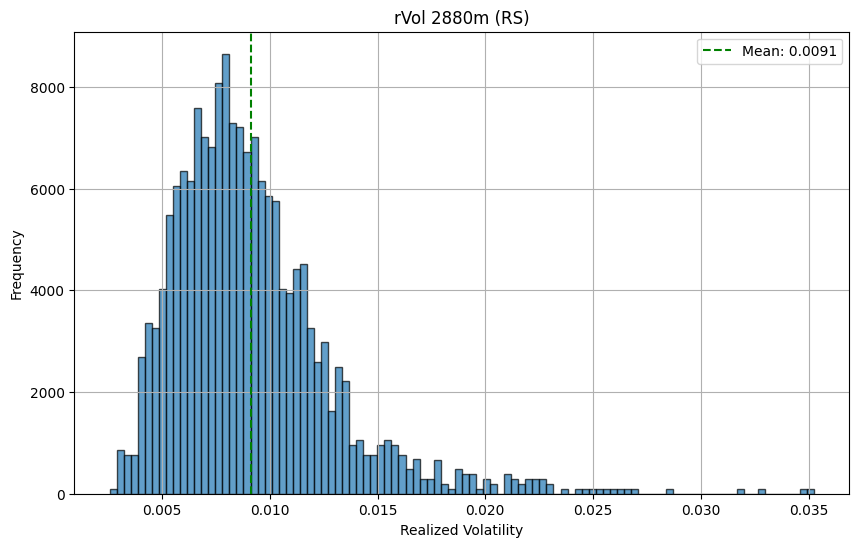

In [62]:
plot_rvol_histogram(rvol_2880m_rs['RVol_2880min_Rogers-Satchell'], title='rVol 2880m (RS)', bins=100)

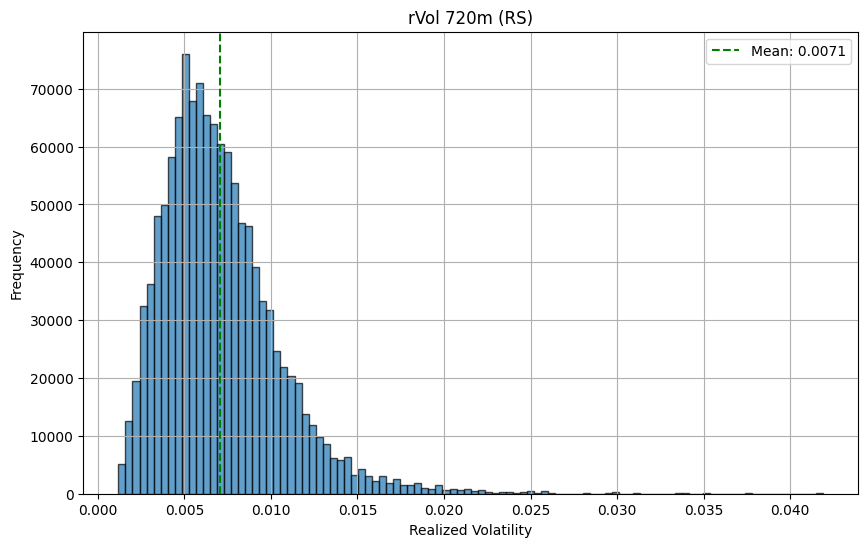

In [63]:
plot_rvol_histogram(RS_720m_rvol['RVol_720min_Rogers-Satchell'], title='rVol 720m (RS)', bins=100)

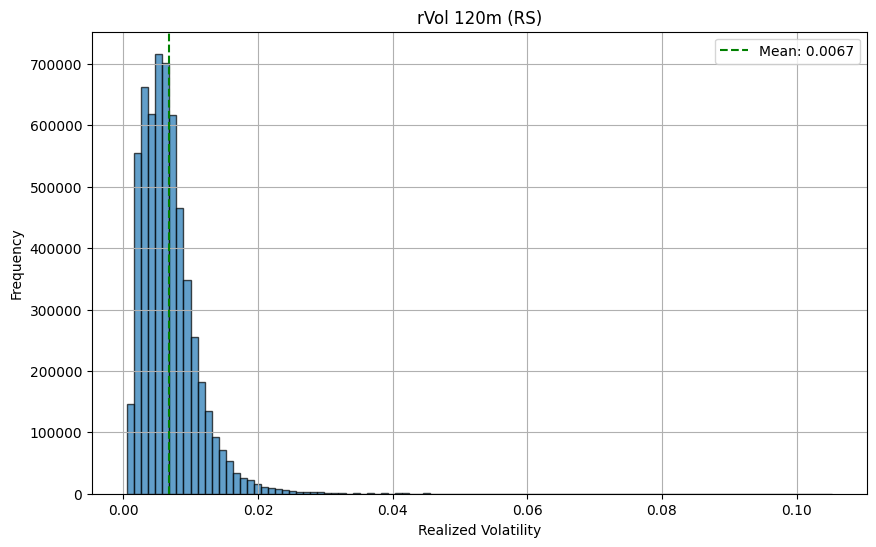

In [64]:
plot_rvol_histogram(RS_120m_rvol['RVol_120min_Rogers-Satchell'], title='rVol 120m (RS)', bins=100)

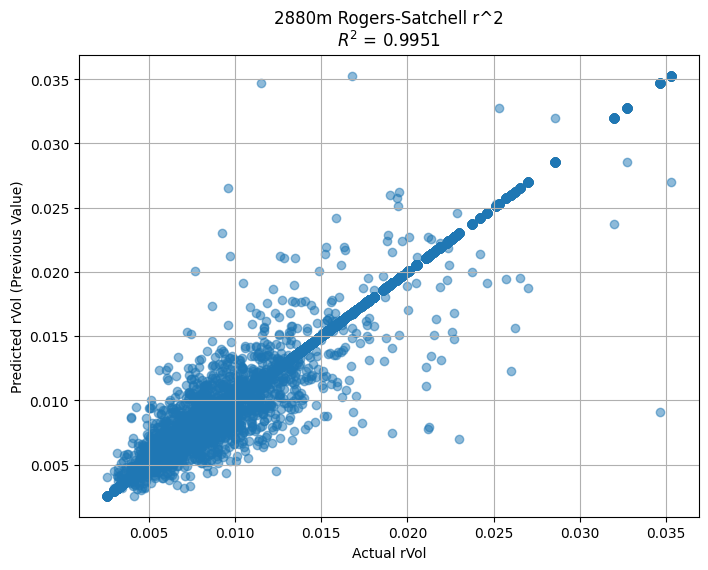

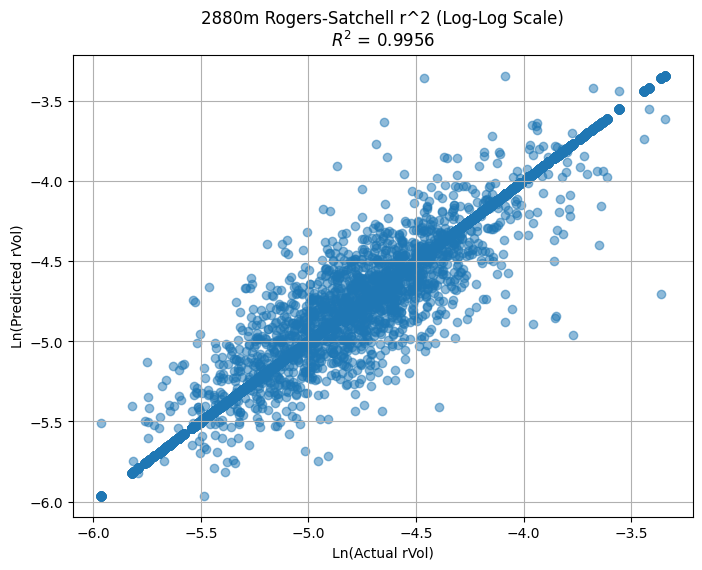

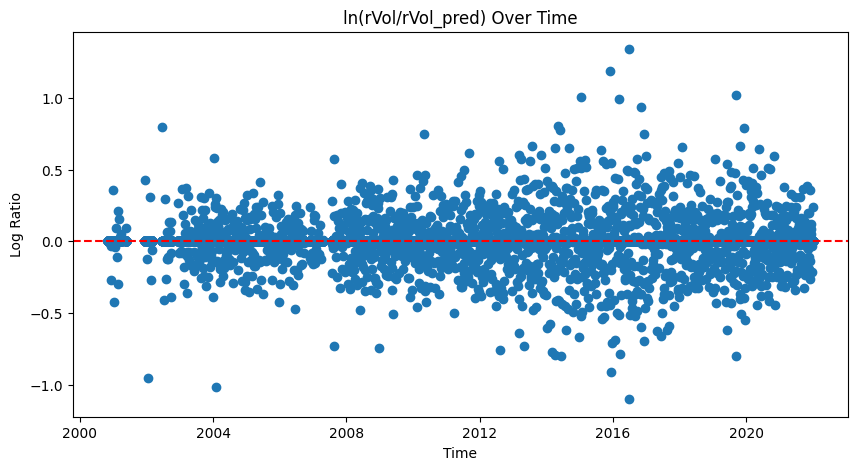

Prediction Quality Analysis:
Mean (Bias): -0.0000
  > Close to 0 = Unbiased predictions
Standard Deviation (Consistency): 0.0253
  > Smaller = More consistent predictions
Skewness (Error Asymmetry): 1.3060
  > 0 = Symmetric errors
  > Positive = More over-predictions
  > Negative = More under-predictions
Kurtosis (Tail Behavior): 469.0615
  > 0 = Normal tail behavior
  > Positive = More extreme errors
Correlation: 0.9975
  > 1 = Perfect linear relationship


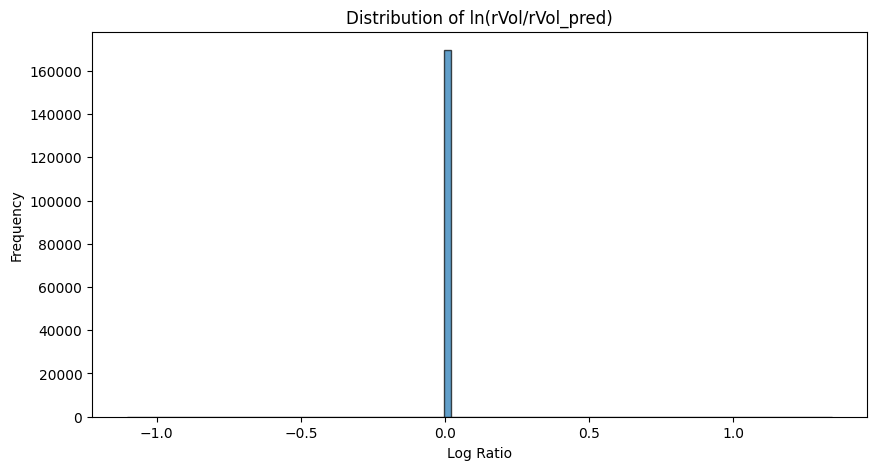

In [65]:
plot_rvol_r2(rvol_2880m_rs['RVol_2880min_Rogers-Satchell'], title='2880m Rogers-Satchell r^2')


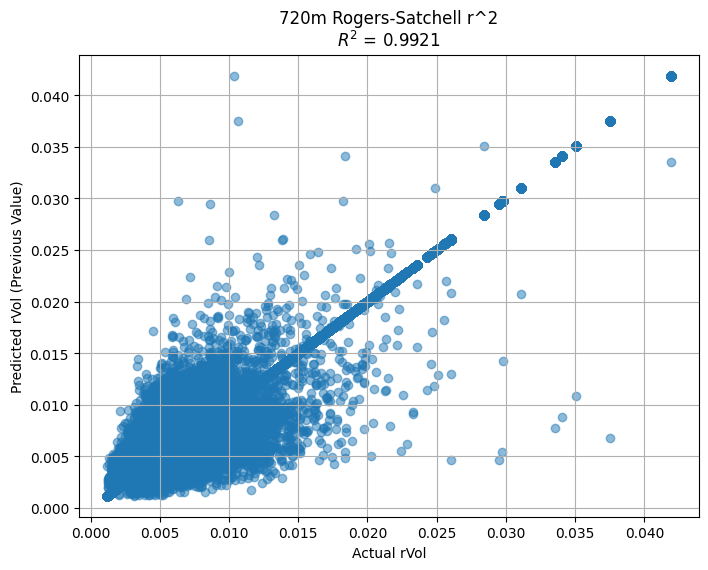

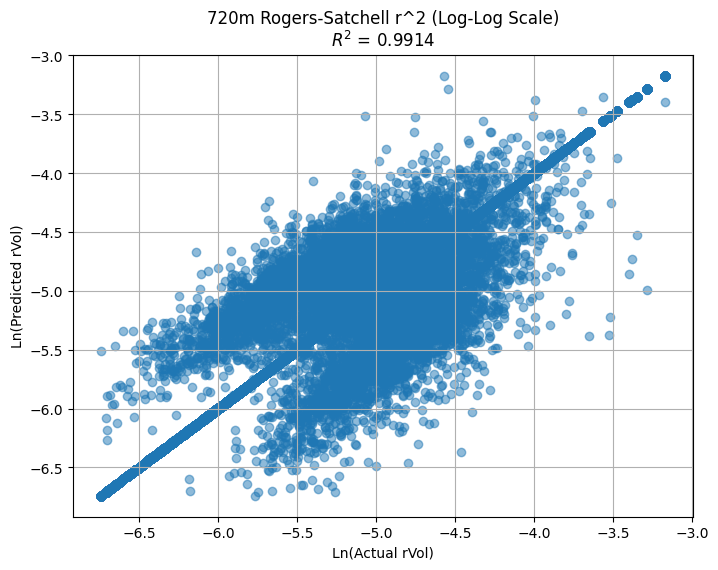

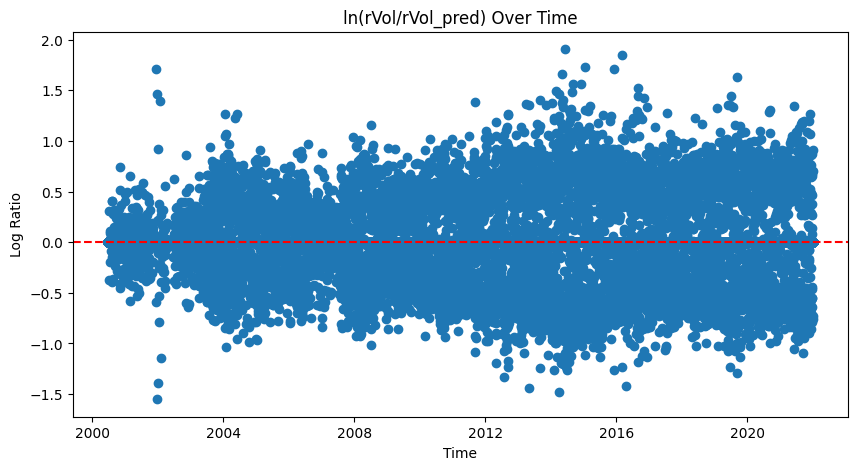

Prediction Quality Analysis:
Mean (Bias): -0.0000
  > Close to 0 = Unbiased predictions
Standard Deviation (Consistency): 0.0444
  > Smaller = More consistent predictions
Skewness (Error Asymmetry): 1.8865
  > 0 = Symmetric errors
  > Positive = More over-predictions
  > Negative = More under-predictions
Kurtosis (Tail Behavior): 302.4215
  > 0 = Normal tail behavior
  > Positive = More extreme errors
Correlation: 0.9961
  > 1 = Perfect linear relationship


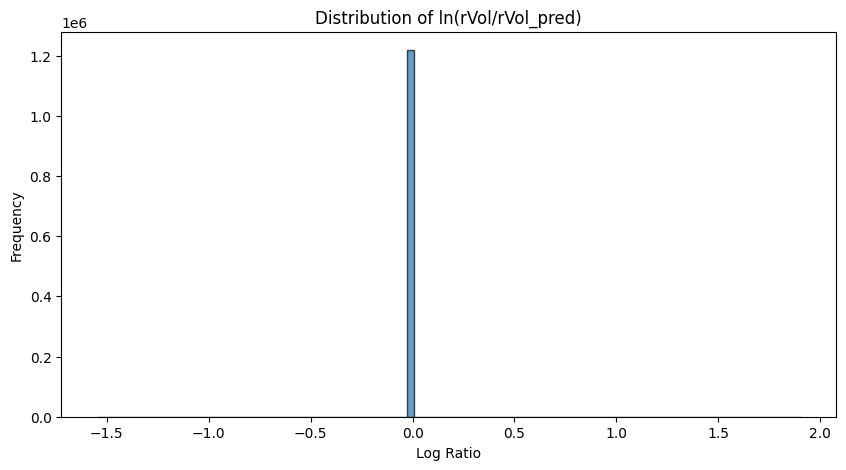

In [66]:
plot_rvol_r2(RS_720m_rvol['RVol_720min_Rogers-Satchell'], title='720m Rogers-Satchell r^2')


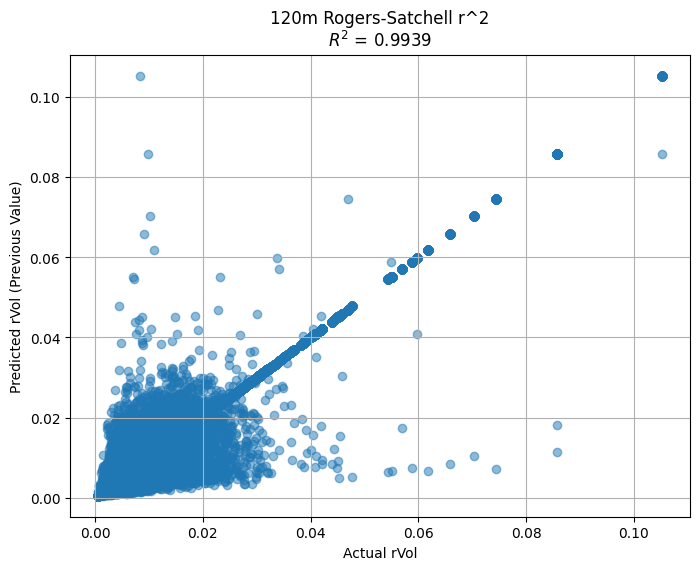

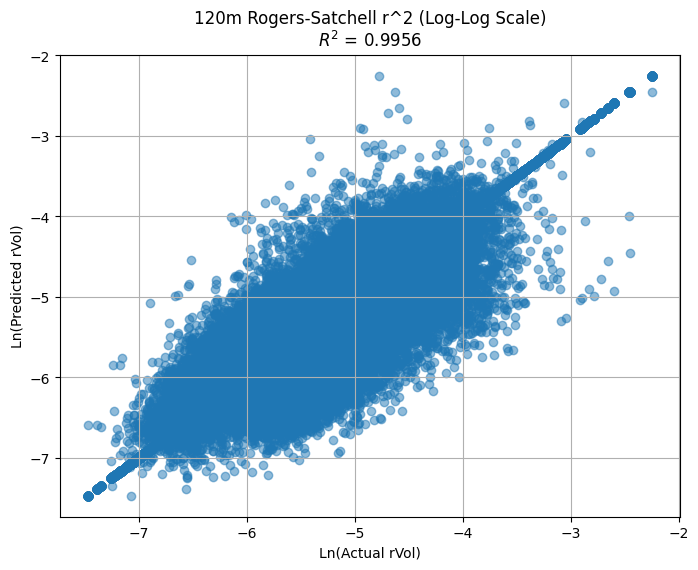

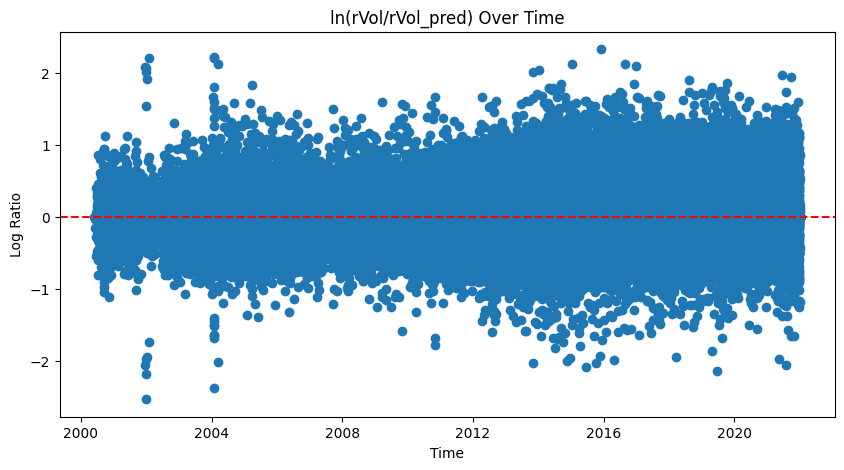

Prediction Quality Analysis:
Mean (Bias): -0.0000
  > Close to 0 = Unbiased predictions
Standard Deviation (Consistency): 0.0398
  > Smaller = More consistent predictions
Skewness (Error Asymmetry): 4.5968
  > 0 = Symmetric errors
  > Positive = More over-predictions
  > Negative = More under-predictions
Kurtosis (Tail Behavior): 478.8405
  > 0 = Normal tail behavior
  > Positive = More extreme errors
Correlation: 0.9969
  > 1 = Perfect linear relationship


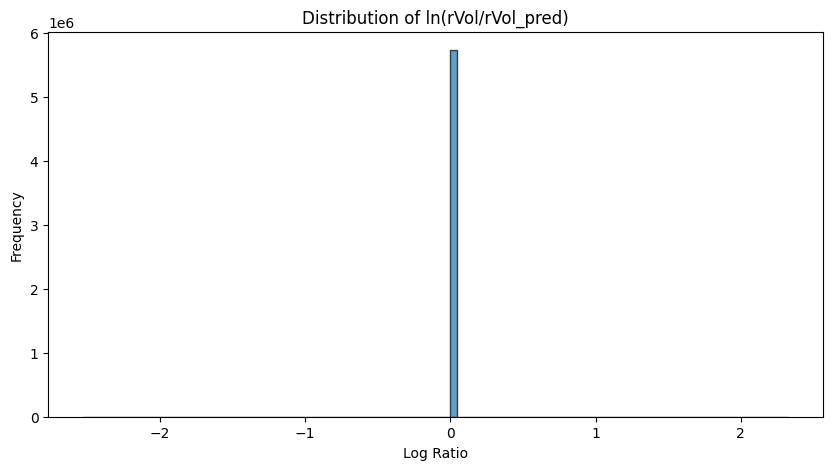

In [67]:
plot_rvol_r2(RS_120m_rvol['RVol_120min_Rogers-Satchell'], title='120m Rogers-Satchell r^2')

In [ ]:
#ML Model

In [ ]:
def preprocess_rvol_data(rvol, minute_interval):
    # Ensure 'DateTime' is in datetime format
    rvol.reset_index(inplace=True)
    rvol['DateTime'] = pd.to_datetime(rvol['DateTime'], format='%Y%m%d %H%M%S')
    rvol = rvol.groupby(pd.Grouper(key='DateTime', freq=f'{minute_interval}Min',closed='right',label='right')).agg({
                                          "Open":  "first",
                                          "High":  "max",
                                          "Low":   "min",
                                         "Close": "last",
                                          "Volume": "sum",
                                          "indicator": "sum",
                                          "group_id": "mean",
                                          "RVol_120min_Rogers-Satchell": "mean"
                                          
                                          })
    
    return rvol

In [87]:
rvol120 = preprocess_rvol_data(RS_120m_rvol, minute_interval = 120)

In [ ]:
rvol120

0


,Open,High,Low,Close,indicator,group_id,RVol_120min_Rogers-Satchell,previous_rvol
DateTime,,,,,,,,
2000-06-06 10:00:00,0.94800,0.96030,0.94760,0.95860,11.0,81.000000,0.014565,NaN
2000-06-08 08:00:00,0.96690,0.96740,0.96690,0.96740,0.0,105.000000,0.014176,0.014565
2000-06-08 10:00:00,0.96790,0.97040,0.95680,0.95800,7.0,105.000000,0.014176,0.014176
2000-06-09 10:00:00,0.95170,0.95220,0.94630,0.94880,8.0,117.000000,0.012124,0.014176
2000-06-15 10:00:00,0.95480,0.95500,0.95470,0.95500,0.0,190.000000,0.007048,0.012124
...,...,...,...,...,...,...,...,...
2021-12-31 10:00:00,1.13268,1.13534,1.13191,1.13399,0.0,94617.008333,0.008028,0.004754
2021-12-31 12:00:00,1.13400,1.13796,1.13379,1.13789,0.0,94618.008333,0.009392,0.008028
2021-12-31 14:00:00,1.13790,1.13863,1.13747,1.13847,1.0,94619.008403,0.002889,0.009392


C:\Users\estifo\AppData\Roaming\Python\Python313\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.586e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\estifo\AppData\Roaming\Python\Python313\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: -267846.48675245076
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -267846.4867284734
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                267846.
Distribution:                  Normal   AIC:                          -535685.
Method:            Maximum Likelihood   BIC:                          -535649.
                                        No. Observations:                54001
Date:                Fri, Apr 18 2025   Df Residuals:                    54000
Time:                        14:34:52   Df Model:                            1
         

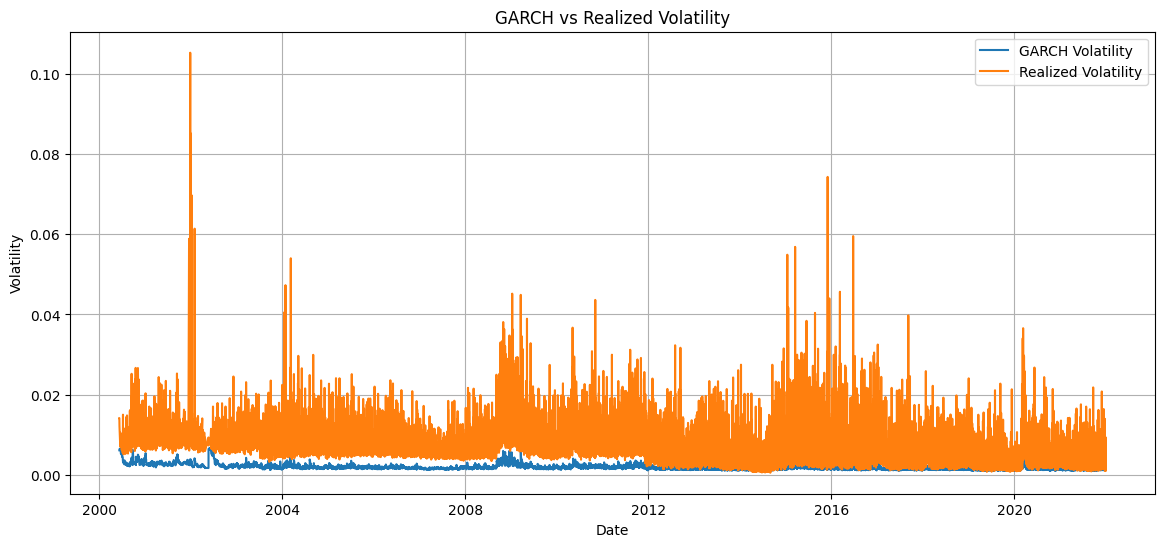

In [107]:
from arch import arch_model
df = rvol120.copy()
# Prepare data - use log returns
returns = np.log(df['Close'] / df['Close'].shift(1)).dropna()

# Fit GARCH(1,1) model
model = arch_model(returns, vol='GARCH', p=1, q=1)
results = model.fit()
print(results.summary())

# Extract conditional volatility
garch_vol = results.conditional_volatility

# Compare with realized volatility
plt.figure(figsize=(14, 6))
plt.plot(df.index[-len(garch_vol):], garch_vol, label='GARCH Volatility')
plt.plot(df.index[-len(garch_vol):], df['RVol_120min_Rogers-Satchell'][-len(garch_vol):], label='Realized Volatility')
plt.title('GARCH vs Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()